In [ ]:


# valid_data = df[['fileName','Duration','ClassName','classID']][df['Duration'] >=2.3 ]
# ## MEL SPECTOGRAM 2 
# def spectroGram(path):
#     D = []
#     print("initial",D)
#     for row in valid_data.itertuples():
#         y,sr = librosa.load(path+"/"+row.fileName,duration=2.28)
#         ps = librosa.feature.melspectrogram(y=y,sr=sr)
#         if ps.shape != (128, 99): continue
#         D.append((ps,row.classID))
#     return D
# spect2 = (spectroGram("Crema"))
# spect,labels=zip(*spect2)

## 70% training data ,, split 65% training 5% validation
# train_spect,valid_spect,label_train_spect,label_valid_spect = train_test_split(X_train_spect,y_train_spect,test_size=0.05,stratify=y_train_spect)

In [1]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.io
from scipy import signal
import glob
import os
import pandas as pd
# import winsound
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('max_rows', None)
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import datasets, layers, models
import keras

In [3]:
import nlpaug.flow as naf
import nlpaug.augmenter.spectrogram as nas
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
flow = naf.Sequential([
    nas.FrequencyMaskingAug(), 
    nas.TimeMaskingAug(), 
])
aug_spect = []
i = 0
print()
for data in X_train_spect:
    aug_spect.append(flow.augment(data))

In [5]:
aug_spect = np.array(aug_spect)

In [6]:
len(aug_spect)

0

In [7]:
new_train = [*X_train_spect,*aug_spect]

NameError: name 'X_train_spect' is not defined

In [240]:
new_train = np.array(new_train)

In [242]:
new_labels = [*y_train_spect,*y_train_spect]

In [243]:
new_labels = np.array(new_labels)
new_labels.shape

(10418,)

In [8]:

def init_data_aug():
    train_datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        fill_mode = 'constant',
        cval=-80.0,
        width_shift_range=0.1,
        height_shift_range=0.0)

    val_datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        fill_mode = 'constant',
        cval=-80.0)
    
    return train_datagen, val_datagen

In [9]:
 train_datagen, val_datagen = init_data_aug()

In [10]:
train_datagen.fit(X_train_spect2)
val_datagen.fit(val_spect)

NameError: name 'X_train_spect2' is not defined

In [70]:
classes = ["ANG","FEA","DIS","HAP","NEU","SAD"]

In [11]:
def create_dataFrame(path):
    df = pd.DataFrame(columns=['fileName',"Duration","ClassName","classID"])
    classes = ["ANG","FEA","DIS","HAP","NEU","SAD"]
    for audio in glob.glob(path+"/*.wav"):
        duration = librosa.get_duration(filename=audio)
        emo = audio[15:18]
        audio = audio[6:]
        index = classes.index(emo)
        df = df.append({'fileName': audio,'Duration':duration,"classID":index,"ClassName":emo}, ignore_index=True)
    return df

In [12]:
df = create_dataFrame("Crema")

In [13]:
valid_data = df

In [14]:
valid_data

fileName  Duration ClassName classID
0     1001_DFA_ANG_XX.wav  2.275562       ANG       0
1     1001_DFA_DIS_XX.wav  2.335688       DIS       2
2     1001_DFA_FEA_XX.wav  2.168813       FEA       1
3     1001_DFA_HAP_XX.wav  1.868500       HAP       3
4     1001_DFA_NEU_XX.wav  2.035375       NEU       4
5     1001_DFA_SAD_XX.wav  2.002000       SAD       5
6     1001_IEO_ANG_HI.wav  1.935250       ANG       0
7     1001_IEO_ANG_LO.wav  2.068750       ANG       0
8     1001_IEO_ANG_MD.wav  2.635937       ANG       0
9     1001_IEO_DIS_HI.wav  2.002000       DIS       2
10    1001_IEO_DIS_LO.wav  2.002000       DIS       2
11    1001_IEO_DIS_MD.wav  1.901875       DIS       2
12    1001_IEO_FEA_HI.wav  1.568250       FEA       1
13    1001_IEO_FEA_LO.wav  1.534875       FEA       1
14    1001_IEO_FEA_MD.wav  1.601625       FEA       1
15    1001_IEO_HAP_HI.wav  1.768438       HAP       3
16    1001_IEO_HAP_MD.wav  1.668313       HAP       3
17    1001_IEO_NEU_XX.wav  1.601625       NEU       4
18    1001_IEO_SAD_HI.wav  2.002000       SAD       5
19    1001_IEO_SAD_LO.wav  1.901875       SAD       5
20    1001_IEO_SAD_MD.wav  1.735062       SAD       5
21    1001_IOM_ANG_XX.wav  2.135438       ANG       0
22    1001_IOM_DIS_XX.wav  2.268937       DIS       2
23    1001_IOM_FEA_XX.wav  2.836187       FEA       1
24    1001_IOM_HAP_XX.wav  2.002000       HAP       3
25    1001_IOM_NEU_XX.wav  2.469125       NEU       4
26    1001_IOM_SAD_XX.wav  1.935250       SAD       5
27    1001_ITH_ANG_XX.wav  2.369000       ANG       0
28    1001_ITH_DIS_XX.wav  2.168813       DIS       2
29    1001_ITH_FEA_XX.wav  2.102125       FEA       1
30    1001_ITH_HAP_XX.wav  2.469125       HAP       3
31    1001_ITH_NEU_XX.wav  2.602625       NEU       4
32    1001_ITS_ANG_XX.wav  2.569250       ANG       0
33    1001_ITS_DIS_XX.wav  2.202187       DIS       2
34    1001_ITS_FEA_XX.wav  2.135438       FEA       1
35    1001_ITS_HAP_XX.wav  2.202187       HAP       3
36    1001_ITS_NEU_XX.wav  2.435750       NEU       4
37    1001_ITS_SAD_XX.wav  2.669313       SAD       5
38    1001_IWL_ANG_XX.wav  3.169812       ANG       0
39    1001_IWL_DIS_XX.wav  2.569250       DIS       2
40    1001_IWL_FEA_XX.wav  2.369000       FEA       1
41    1001_IWL_HAP_XX.wav  2.102125       HAP       3
42    1001_IWL_NEU_XX.wav  2.836187       NEU       4
43    1001_IWL_SAD_XX.wav  2.836187       SAD       5
44    1001_IWW_ANG_XX.wav  2.275562       ANG       0
45    1001_IWW_DIS_XX.wav  2.068750       DIS       2
46    1001_IWW_FEA_XX.wav  2.202187       FEA       1
47    1001_IWW_HAP_XX.wav  1.968625       HAP       3
48    1001_IWW_SAD_XX.wav  2.035375       SAD       5
49    1001_MTI_ANG_XX.wav  3.003000       ANG       0
50    1001_MTI_DIS_XX.wav  2.936250       DIS       2
51    1001_MTI_FEA_XX.wav  2.369000       FEA       1
52    1001_MTI_HAP_XX.wav  2.369000       HAP       3
53    1001_MTI_NEU_XX.wav  2.302313       NEU       4
54    1001_MTI_SAD_XX.wav  2.302313       SAD       5
55    1001_TAI_ANG_XX.wav  2.335688       ANG       0
56    1001_TAI_DIS_XX.wav  2.736063       DIS       2
57    1001_TAI_FEA_XX.wav  2.402375       FEA       1
58    1001_TAI_HAP_XX.wav  2.502500       HAP       3
59    1001_TAI_NEU_XX.wav  2.569250       NEU       4
60    1001_TAI_SAD_XX.wav  2.802812       SAD       5
61    1001_TIE_ANG_XX.wav  3.103125       ANG       0
62    1001_TIE_DIS_XX.wav  2.202187       DIS       2
63    1001_TIE_FEA_XX.wav  2.235562       FEA       1
64    1001_IEO_HAP_LO.wav  1.701688       HAP       3
65    1001_ITH_SAD_XX.wav  2.369000       SAD       5
66    1001_IWW_NEU_XX.wav  2.268937       NEU       4
67    1001_TIE_HAP_XX.wav  2.302313       HAP       3
68    1002_DFA_FEA_XX.wav  2.736063       FEA       1
69    1002_IEO_SAD_HI.wav  2.736063       SAD       5
70    1002_ITS_FEA_XX.wav  2.469125       FEA       1
71    1002_MTI_DIS_XX.wav  3.636938       DIS       2
72    1002_TSI_DIS_XX.wav  2.769437       DIS       2
73    1003_IEO_ANG_HI

In [15]:
df.index[df['Duration'] == 3.970625].tolist()

[235, 565, 1123, 2420, 2596, 4067, 5149, 5422, 6523, 6702, 6729, 7216]

In [18]:
def load_audio(path):
    audio_data = []
    label = []
    fRate= []
    classes = ["ANG","FEA","DIS","HAP","NEU","SAD"]
    for row in valid_data.itertuples():
        sample = 80000/row.Duration
        data,sr = librosa.load(path+"/"+row.fileName,sr=sample)
        print(path+"/"+row.fileName,sr)
        audio_data.append(data)
        fRate.append(sr)
        label.append(row.classID)
    return audio_data,label, fRate

In [19]:
audio_data,labelss,fRate = load_audio("Crema")

Crema/1001_DFA_ANG_XX.wav 35156.14271196682
Crema/1001_DFA_DIS_XX.wav 34251.1573144952
Crema/1001_DFA_FEA_XX.wav 36886.54505633844
Crema/1001_DFA_HAP_XX.wav 42815.092320042815
Crema/1001_DFA_NEU_XX.wav 39304.796413437325
Crema/1001_DFA_SAD_XX.wav 39960.03996003996
Crema/1001_IEO_ANG_HI.wav 41338.32838134608
Crema/1001_IEO_ANG_LO.wav 38670.69486404834
Crema/1001_IEO_ANG_MD.wav 30349.73325429757
Crema/1001_IEO_DIS_HI.wav 39960.03996003996
Crema/1001_IEO_DIS_LO.wav 39960.03996003996
Crema/1001_IEO_DIS_MD.wav 42063.75287545186
Crema/1001_IEO_FEA_HI.wav 51012.274828630645
Crema/1001_IEO_FEA_LO.wav 52121.50826614545
Crema/1001_IEO_FEA_MD.wav 49949.27027237961
Crema/1001_IEO_HAP_HI.wav 45237.67450079519
Crema/1001_IEO_HAP_MD.wav 47952.646761323194
Crema/1001_IEO_NEU_XX.wav 49949.27027237961
Crema/1001_IEO_SAD_HI.wav 39960.03996003996
Crema/1001_IEO_SAD_LO.wav 42063.75287545186
Crema/1001_IEO_SAD_MD.wav 46107.849140881095
Crema/1001_IOM_ANG_XX.wav 37463.04914098399
Crema/1001_IOM_DIS_XX.wav 35

Crema/1003_IEO_NEU_XX.wav 35258.794039060136
Crema/1003_IEO_SAD_HI.wav 32400.141750620158
Crema/1003_IEO_SAD_LO.wav 31968.03196803197
Crema/1003_IEO_SAD_MD.wav 29970.263878807742
Crema/1003_IOM_ANG_XX.wav 29239.098156566233
Crema/1003_IOM_FEA_XX.wav 29970.263878807742
Crema/1003_IOM_HAP_XX.wav 27558.885587564055
Crema/1003_IOM_NEU_XX.wav 24975.122436635385
Crema/1003_IOM_SAD_XX.wav 28206.879834284584
Crema/1003_ITH_ANG_XX.wav 21796.509152830993
Crema/1003_ITH_DIS_XX.wav 19814.85494906963
Crema/1003_ITH_FEA_XX.wav 22618.837250397595
Crema/1003_ITH_HAP_XX.wav 25506.645676822827
Crema/1003_ITH_NEU_XX.wav 19814.85494906963
Crema/1003_ITH_SAD_XX.wav 21996.52867281882
Crema/1003_ITS_ANG_XX.wav 21407.188132390078
Crema/1003_ITS_DIS_XX.wav 21600.09450041344
Crema/1003_ITS_FEA_XX.wav 25506.645676822827
Crema/1003_ITS_HAP_XX.wav 21407.188132390078
Crema/1003_ITS_NEU_XX.wav 21407.188132390078
Crema/1003_ITS_SAD_XX.wav 22834.308548594265
Crema/1003_IWL_DIS_XX.wav 18163.75762735916
Crema/1003_IWL_F

Crema/1005_MTI_ANG_XX.wav 21600.09450041344
Crema/1005_MTI_DIS_XX.wav 20318.75039685059
Crema/1005_MTI_FEA_XX.wav 22199.86818828263
Crema/1005_MTI_HAP_XX.wav 22834.308548594265
Crema/1005_MTI_NEU_XX.wav 23738.87240356083
Crema/1005_MTI_SAD_XX.wav 25780.463242698894
Crema/1005_TAI_ANG_XX.wav 22199.86818828263
Crema/1005_TAI_DIS_XX.wav 21996.52867281882
Crema/1005_TAI_FEA_XX.wav 31547.29629812195
Crema/1005_TAI_HAP_XX.wav 28206.879834284584
Crema/1005_TAI_NEU_XX.wav 24218.1143927497
Crema/1005_TIE_ANG_XX.wav 27245.636441038743
Crema/1005_TIE_DIS_XX.wav 23506.078524993573
Crema/1005_TIE_FEA_XX.wav 31137.491485842173
Crema/1005_TIE_HAP_XX.wav 19028.64703346366
Crema/1005_TIE_NEU_XX.wav 27879.421502003835
Crema/1005_TIE_SAD_XX.wav 17004.317502490867
Crema/1005_TSI_ANG_XX.wav 26640.026640026637
Crema/1005_TSI_DIS_XX.wav 22199.86818828263
Crema/1005_TSI_FEA_XX.wav 27558.885587564055
Crema/1005_TSI_HAP_XX.wav 28206.879834284584
Crema/1005_TSI_NEU_XX.wav 28542.758390010036
Crema/1005_TSI_SAD_XX

Crema/1007_IEO_NEU_XX.wav 38670.69486404834
Crema/1007_ITS_DIS_XX.wav 17760.01776001776
Crema/1007_TSI_ANG_XX.wav 35258.794039060136
Crema/1007_TSI_DIS_XX.wav 27245.636441038743
Crema/1007_TSI_FEA_XX.wav 28542.758390010036
Crema/1007_TSI_HAP_XX.wav 38056.72831063804
Crema/1007_TSI_NEU_XX.wav 26939.428379004083
Crema/1007_TSI_SAD_XX.wav 25506.645676822827
Crema/1007_WSI_ANG_XX.wav 24975.122436635385
Crema/1007_WSI_DIS_XX.wav 20147.961592948213
Crema/1007_WSI_FEA_XX.wav 25238.085848926396
Crema/1007_WSI_HAP_XX.wav 26347.206784405746
Crema/1007_WSI_NEU_XX.wav 18302.186253342294
Crema/1007_WSI_SAD_XX.wav 23277.806066778205
Crema/1008_DFA_ANG_XX.wav 25780.463242698894
Crema/1008_DFA_DIS_XX.wav 21996.52867281882
Crema/1008_DFA_FEA_XX.wav 31137.491485842173
Crema/1008_DFA_HAP_XX.wav 24975.122436635385
Crema/1008_DFA_SAD_XX.wav 21407.188132390078
Crema/1008_IEO_ANG_HI.wav 27878.81427918019
Crema/1008_IEO_ANG_LO.wav 34747.6721774303
Crema/1008_IEO_ANG_MD.wav 31137.491485842173
Crema/1008_IEO_DI

Crema/1010_ITH_HAP_XX.wav 28206.879834284584
Crema/1010_ITH_NEU_XX.wav 29970.263878807742
Crema/1010_ITH_SAD_XX.wav 27879.421502003835
Crema/1010_ITS_ANG_XX.wav 29239.098156566233
Crema/1010_ITS_DIS_XX.wav 25780.463242698894
Crema/1010_ITS_FEA_XX.wav 27558.885587564055
Crema/1010_ITS_HAP_XX.wav 40637.50079370118
Crema/1010_ITS_NEU_XX.wav 31968.03196803197
Crema/1010_IWL_ANG_XX.wav 26640.026640026637
Crema/1010_IWL_DIS_XX.wav 27879.421502003835
Crema/1010_IWL_FEA_XX.wav 27879.421502003835
Crema/1010_IWL_HAP_XX.wav 34251.1573144952
Crema/1010_IWL_NEU_XX.wav 21600.09450041344
Crema/1010_IWL_SAD_XX.wav 33769.52300548754
Crema/1010_IWW_ANG_XX.wav 35156.14271196682
Crema/1010_IWW_DIS_XX.wav 30738.197012631477
Crema/1010_IWW_FEA_XX.wav 22199.86818828263
Crema/1010_IWW_HAP_XX.wav 27879.421502003835
Crema/1010_IWW_NEU_XX.wav 31968.03196803197
Crema/1010_IWW_SAD_XX.wav 28542.758390010036
Crema/1010_MTI_ANG_XX.wav 26939.428379004083
Crema/1010_MTI_DIS_XX.wav 29600.166500936568
Crema/1010_MTI_FEA_

Crema/1012_IWW_FEA_XX.wav 30738.197012631477
Crema/1012_IWW_HAP_XX.wav 29600.166500936568
Crema/1012_IWW_NEU_XX.wav 33769.52300548754
Crema/1012_IWW_SAD_XX.wav 32844.09319511444
Crema/1012_MTI_ANG_XX.wav 33300.37983245746
Crema/1012_MTI_DIS_XX.wav 26939.428379004083
Crema/1012_MTI_FEA_XX.wav 35258.794039060136
Crema/1012_MTI_HAP_XX.wav 29970.263878807742
Crema/1012_MTI_NEU_XX.wav 31968.03196803197
Crema/1012_MTI_SAD_XX.wav 29970.263878807742
Crema/1012_TAI_ANG_XX.wav 34251.1573144952
Crema/1012_TAI_DIS_XX.wav 25780.463242698894
Crema/1012_TAI_FEA_XX.wav 33300.37983245746
Crema/1012_TAI_HAP_XX.wav 29600.166500936568
Crema/1012_TAI_SAD_XX.wav 30738.197012631477
Crema/1012_TIE_ANG_XX.wav 28542.758390010036
Crema/1012_TIE_DIS_XX.wav 29600.166500936568
Crema/1012_TIE_FEA_XX.wav 29970.263878807742
Crema/1012_TIE_HAP_XX.wav 22407.394440165255
Crema/1012_TIE_NEU_XX.wav 28206.879834284584
Crema/1012_TIE_SAD_XX.wav 25780.463242698894
Crema/1012_TSI_ANG_XX.wav 32844.09319511444
Crema/1012_TSI_DIS

Crema/1050_WSI_NEU_XX.wav 37463.04914098399
Crema/1054_IOM_FEA_XX.wav 42813.66023346825
Crema/1057_IWW_NEU_XX.wav 35046.409112066365
Crema/1060_WSI_ANG_XX.wav 31547.29629812195
Crema/1064_IEO_SAD_LO.wav 38056.72831063804
Crema/1067_IWW_ANG_XX.wav 39304.796413437325
Crema/1070_TSI_FEA_XX.wav 35258.794039060136
Crema/1074_IEO_HAP_LO.wav 36327.51525471832
Crema/1077_IWL_HAP_XX.wav 33300.37983245746
Crema/1080_TIE_SAD_XX.wav 20147.961592948213
Crema/1084_IEO_FEA_LO.wav 38670.69486404834
Crema/1087_ITS_SAD_XX.wav 29600.166500936568
Crema/1014_MTI_ANG_XX.wav 23506.078524993573
Crema/1014_MTI_DIS_XX.wav 31547.29629812195
Crema/1014_MTI_FEA_XX.wav 25780.463242698894
Crema/1014_MTI_HAP_XX.wav 34747.6721774303
Crema/1014_MTI_NEU_XX.wav 25780.463242698894
Crema/1014_MTI_SAD_XX.wav 34747.6721774303
Crema/1014_TAI_ANG_XX.wav 26640.026640026637
Crema/1014_TAI_DIS_XX.wav 25506.645676822827
Crema/1014_TAI_FEA_XX.wav 33300.37983245746
Crema/1014_TAI_HAP_XX.wav 30738.197012631477
Crema/1014_TAI_NEU_XX.w

Crema/1016_TSI_HAP_XX.wav 36886.54505633844
Crema/1016_TSI_SAD_XX.wav 37463.04914098399
Crema/1016_WSI_ANG_XX.wav 30349.73325429757
Crema/1016_WSI_DIS_XX.wav 25506.645676822827
Crema/1016_WSI_FEA_XX.wav 33769.52300548754
Crema/1016_WSI_HAP_XX.wav 35156.14271196682
Crema/1016_WSI_NEU_XX.wav 31137.491485842173
Crema/1016_WSI_SAD_XX.wav 34747.6721774303
Crema/1017_DFA_ANG_XX.wav 49949.27027237961
Crema/1017_DFA_DIS_XX.wav 49949.27027237961
Crema/1017_DFA_FEA_XX.wav 58479.53216374268
Crema/1017_DFA_HAP_XX.wav 42063.75287545186
Crema/1017_DFA_NEU_XX.wav 46107.849140881095
Crema/1017_DFA_SAD_XX.wav 47952.646761323194
Crema/1017_IEO_ANG_HI.wav 31137.491485842173
Crema/1017_IEO_ANG_LO.wav 38670.69486404834
Crema/1017_IEO_ANG_MD.wav 34747.6721774303
Crema/1017_IEO_DIS_LO.wav 38670.69486404834
Crema/1017_IEO_DIS_MD.wav 34747.6721774303
Crema/1017_IEO_FEA_HI.wav 34747.6721774303
Crema/1017_IEO_FEA_LO.wav 48931.534080048936
Crema/1017_IEO_FEA_MD.wav 32844.09319511444
Crema/1017_IEO_HAP_HI.wav 4133

Crema/1019_IEO_DIS_HI.wav 31137.491485842173
Crema/1019_IEO_DIS_LO.wav 35156.14271196682
Crema/1019_IEO_DIS_MD.wav 39304.796413437325
Crema/1019_IEO_FEA_HI.wav 29600.166500936568
Crema/1019_IEO_FEA_LO.wav 47012.157049987145
Crema/1019_IEO_FEA_MD.wav 32400.141750620158
Crema/1019_IEO_HAP_LO.wav 45237.67450079519
Crema/1019_IEO_HAP_MD.wav 41338.32838134608
Crema/1019_IEO_NEU_XX.wav 44399.73637656526
Crema/1019_IEO_SAD_HI.wav 54491.27288207749
Crema/1019_IEO_SAD_LO.wav 40637.50079370118
Crema/1019_IEO_SAD_MD.wav 34747.6721774303
Crema/1019_IOM_ANG_XX.wav 31968.03196803197
Crema/1019_IOM_DIS_XX.wav 26347.206784405746
Crema/1019_IOM_FEA_XX.wav 34747.6721774303
Crema/1019_IOM_HAP_XX.wav 35156.14271196682
Crema/1019_IOM_NEU_XX.wav 42815.092320042815
Crema/1019_IOM_SAD_XX.wav 36886.54505633844
Crema/1019_ITS_ANG_XX.wav 36886.54505633844
Crema/1019_ITS_DIS_XX.wav 28542.758390010036
Crema/1019_ITS_FEA_XX.wav 29970.263878807742
Crema/1019_ITS_HAP_XX.wav 24717.58231148016
Crema/1019_ITS_SAD_XX.wav

Crema/1021_ITS_ANG_XX.wav 24975.122436635385
Crema/1021_ITS_DIS_XX.wav 25506.645676822827
Crema/1021_ITS_FEA_XX.wav 27558.885587564055
Crema/1021_ITS_HAP_XX.wav 29600.166500936568
Crema/1021_ITS_NEU_XX.wav 28886.732414073256
Crema/1021_ITS_SAD_XX.wav 26347.206784405746
Crema/1021_IWL_ANG_XX.wav 26939.428379004083
Crema/1021_IWL_DIS_XX.wav 29600.166500936568
Crema/1021_IWL_FEA_XX.wav 26939.428379004083
Crema/1021_IWL_HAP_XX.wav 24218.1143927497
Crema/1021_IWL_SAD_XX.wav 28206.879834284584
Crema/1021_IWW_ANG_XX.wav 27558.885587564055
Crema/1021_IWW_DIS_XX.wav 27245.636441038743
Crema/1021_IWW_FEA_XX.wav 24218.1143927497
Crema/1021_IWW_HAP_XX.wav 28542.758390010036
Crema/1021_IWW_NEU_XX.wav 30349.73325429757
Crema/1021_IWW_SAD_XX.wav 28206.879834284584
Crema/1021_MTI_ANG_XX.wav 23738.432150739045
Crema/1021_MTI_DIS_XX.wav 28206.879834284584
Crema/1021_MTI_FEA_XX.wav 23277.806066778205
Crema/1021_MTI_HAP_XX.wav 26640.026640026637
Crema/1021_MTI_NEU_XX.wav 28206.879834284584
Crema/1021_MTI_

Crema/1023_TIE_FEA_XX.wav 25506.645676822827
Crema/1023_TIE_NEU_XX.wav 29600.166500936568
Crema/1023_TIE_SAD_XX.wav 26640.026640026637
Crema/1023_TSI_ANG_XX.wav 29970.263878807742
Crema/1023_TSI_DIS_XX.wav 39304.796413437325
Crema/1023_TSI_FEA_XX.wav 41338.32838134608
Crema/1023_TSI_HAP_XX.wav 42815.092320042815
Crema/1023_TSI_NEU_XX.wav 35258.794039060136
Crema/1023_TSI_SAD_XX.wav 38056.72831063804
Crema/1023_WSI_ANG_XX.wav 29600.166500936568
Crema/1023_WSI_DIS_XX.wav 31137.491485842173
Crema/1023_WSI_FEA_XX.wav 38056.72831063804
Crema/1023_WSI_HAP_XX.wav 41338.32838134608
Crema/1023_WSI_NEU_XX.wav 37463.04914098399
Crema/1023_WSI_SAD_XX.wav 38670.69486404834
Crema/1024_DFA_ANG_XX.wav 37463.04914098399
Crema/1024_DFA_DIS_XX.wav 28542.758390010036
Crema/1024_DFA_HAP_XX.wav 41338.32838134608
Crema/1024_DFA_NEU_XX.wav 44399.73637656526
Crema/1024_DFA_SAD_XX.wav 46107.849140881095
Crema/1024_IEO_ANG_HI.wav 31968.03196803197
Crema/1024_IEO_ANG_LO.wav 41338.32838134608
Crema/1024_IEO_ANG_MD

Crema/1026_DFA_DIS_XX.wav 37463.04914098399
Crema/1026_DFA_FEA_XX.wav 39304.796413437325
Crema/1026_DFA_HAP_XX.wav 42815.092320042815
Crema/1026_DFA_NEU_XX.wav 44399.73637656526
Crema/1026_DFA_SAD_XX.wav 47952.646761323194
Crema/1026_IEO_ANG_HI.wav 31137.491485842173
Crema/1026_IEO_ANG_LO.wav 40637.50079370118
Crema/1026_IEO_DIS_HI.wav 43592.27599359739
Crema/1026_IEO_DIS_LO.wav 42063.75287545186
Crema/1026_IEO_DIS_MD.wav 55758.84300400767
Crema/1026_IEO_FEA_HI.wav 36886.54505633844
Crema/1026_IEO_FEA_LO.wav 34251.1573144952
Crema/1026_IEO_FEA_MD.wav 42063.75287545186
Crema/1026_IEO_HAP_HI.wav 43592.27599359739
Crema/1026_IEO_HAP_LO.wav 39960.03996003996
Crema/1026_IEO_HAP_MD.wav 48931.534080048936
Crema/1026_IEO_NEU_XX.wav 39304.796413437325
Crema/1026_IEO_SAD_HI.wav 25238.085848926396
Crema/1026_IEO_SAD_LO.wav 36327.51525471832
Crema/1026_IEO_SAD_MD.wav 34251.1573144952
Crema/1026_IOM_ANG_XX.wav 38056.72831063804
Crema/1026_IOM_DIS_XX.wav 36886.54505633844
Crema/1026_IOM_FEA_XX.wav 4

Crema/1028_IEO_SAD_HI.wav 29970.263878807742
Crema/1028_IEO_SAD_LO.wav 48931.534080048936
Crema/1028_IEO_SAD_MD.wav 35258.794039060136
Crema/1028_IOM_ANG_XX.wav 38056.72831063804
Crema/1028_IOM_DIS_XX.wav 33769.52300548754
Crema/1028_IOM_FEA_XX.wav 35258.794039060136
Crema/1028_IOM_HAP_XX.wav 39304.796413437325
Crema/1028_IOM_NEU_XX.wav 39304.796413437325
Crema/1028_IOM_SAD_XX.wav 34747.6721774303
Crema/1028_ITH_ANG_XX.wav 30738.197012631477
Crema/1028_ITH_DIS_XX.wav 26060.754133072725
Crema/1028_ITH_FEA_XX.wav 25780.463242698894
Crema/1028_ITH_NEU_XX.wav 24465.29941321508
Crema/1028_ITH_SAD_XX.wav 25780.463242698894
Crema/1028_ITS_ANG_XX.wav 29600.166500936568
Crema/1028_ITS_DIS_XX.wav 27558.885587564055
Crema/1028_ITS_FEA_XX.wav 28542.758390010036
Crema/1028_ITS_HAP_XX.wav 32844.09319511444
Crema/1028_ITS_NEU_XX.wav 28206.879834284584
Crema/1028_ITS_SAD_XX.wav 35785.17710866952
Crema/1028_IWL_ANG_XX.wav 29600.166500936568
Crema/1028_IWL_DIS_XX.wav 28886.732414073256
Crema/1028_IWL_FE

Crema/1030_MTI_DIS_XX.wav 26060.754133072725
Crema/1030_MTI_HAP_XX.wav 26060.754133072725
Crema/1030_MTI_NEU_XX.wav 34747.6721774303
Crema/1030_MTI_SAD_XX.wav 20147.961592948213
Crema/1030_TAI_ANG_XX.wav 26060.754133072725
Crema/1030_TAI_DIS_XX.wav 20848.60330645818
Crema/1030_TAI_FEA_XX.wav 24975.122436635385
Crema/1030_TAI_HAP_XX.wav 31968.03196803197
Crema/1030_TAI_NEU_XX.wav 27558.885587564055
Crema/1030_TAI_SAD_XX.wav 19335.639511170863
Crema/1030_TIE_ANG_XX.wav 23738.87240356083
Crema/1030_TIE_DIS_XX.wav 25780.463242698894
Crema/1030_TIE_FEA_XX.wav 26640.026640026637
Crema/1030_TIE_HAP_XX.wav 28886.732414073256
Crema/1030_TIE_NEU_XX.wav 29239.098156566233
Crema/1030_TIE_SAD_XX.wav 26060.754133072725
Crema/1030_TSI_ANG_XX.wav 32844.09319511444
Crema/1030_TSI_FEA_XX.wav 35258.794039060136
Crema/1030_TSI_HAP_XX.wav 29600.166500936568
Crema/1030_TSI_NEU_XX.wav 37463.04914098399
Crema/1030_TSI_SAD_XX.wav 30349.73325429757
Crema/1030_WSI_ANG_XX.wav 26939.428379004083
Crema/1030_WSI_DIS

Crema/1032_TSI_ANG_XX.wav 31547.29629812195
Crema/1032_TSI_DIS_XX.wav 29970.263878807742
Crema/1032_TSI_FEA_XX.wav 34747.6721774303
Crema/1032_TSI_HAP_XX.wav 32400.141750620158
Crema/1032_TSI_NEU_XX.wav 31547.29629812195
Crema/1032_TSI_SAD_XX.wav 31547.29629812195
Crema/1032_WSI_ANG_XX.wav 31137.491485842173
Crema/1032_WSI_FEA_XX.wav 29239.098156566233
Crema/1032_WSI_HAP_XX.wav 31968.03196803197
Crema/1032_WSI_NEU_XX.wav 26640.026640026637
Crema/1032_WSI_SAD_XX.wav 29239.098156566233
Crema/1033_DFA_ANG_XX.wav 39960.03996003996
Crema/1033_DFA_DIS_XX.wav 33769.52300548754
Crema/1033_DFA_FEA_XX.wav 34251.1573144952
Crema/1033_DFA_HAP_XX.wav 28206.879834284584
Crema/1033_DFA_NEU_XX.wav 29600.166500936568
Crema/1033_DFA_SAD_XX.wav 32400.141750620158
Crema/1033_IEO_ANG_HI.wav 39304.796413437325
Crema/1033_IEO_ANG_LO.wav 46107.849140881095
Crema/1033_IEO_ANG_MD.wav 39304.796413437325
Crema/1033_IEO_DIS_HI.wav 41338.32838134608
Crema/1033_IEO_DIS_LO.wav 30738.197012631477
Crema/1033_IEO_DIS_MD

Crema/1035_DFA_SAD_XX.wav 34251.1573144952
Crema/1035_IEO_ANG_HI.wav 31547.29629812195
Crema/1035_IEO_ANG_LO.wav 47012.157049987145
Crema/1035_IEO_ANG_MD.wav 33300.37983245746
Crema/1035_IEO_DIS_HI.wav 28542.758390010036
Crema/1035_IEO_DIS_LO.wav 42063.75287545186
Crema/1035_IEO_DIS_MD.wav 32844.09319511444
Crema/1035_IEO_FEA_HI.wav 43592.27599359739
Crema/1035_IEO_FEA_LO.wav 47952.646761323194
Crema/1035_IEO_FEA_MD.wav 34747.6721774303
Crema/1035_IEO_HAP_HI.wav 42815.092320042815
Crema/1035_IEO_HAP_LO.wav 40637.50079370118
Crema/1035_IEO_HAP_MD.wav 36327.51525471832
Crema/1035_IEO_SAD_HI.wav 35258.794039060136
Crema/1035_IEO_SAD_LO.wav 37463.04914098399
Crema/1035_IEO_SAD_MD.wav 37463.04914098399
Crema/1035_IOM_ANG_XX.wav 36886.54505633844
Crema/1035_IOM_DIS_XX.wav 34251.1573144952
Crema/1035_IOM_FEA_XX.wav 31968.03196803197
Crema/1035_IOM_HAP_XX.wav 39304.796413437325
Crema/1035_IOM_NEU_XX.wav 35258.794039060136
Crema/1035_IOM_SAD_XX.wav 34747.6721774303
Crema/1035_ITH_ANG_XX.wav 307

Crema/1037_ITS_SAD_XX.wav 30738.197012631477
Crema/1037_IWL_ANG_XX.wav 26640.026640026637
Crema/1037_IWL_FEA_XX.wav 31547.29629812195
Crema/1037_IWL_HAP_XX.wav 29970.263878807742
Crema/1037_IWL_NEU_XX.wav 36327.51525471832
Crema/1037_IWL_SAD_XX.wav 26347.206784405746
Crema/1037_IWW_ANG_XX.wav 27558.885587564055
Crema/1037_IWW_DIS_XX.wav 26640.026640026637
Crema/1037_IWW_FEA_XX.wav 28886.732414073256
Crema/1037_IWW_HAP_XX.wav 33768.63210658224
Crema/1037_IWW_NEU_XX.wav 30349.73325429757
Crema/1037_IWW_SAD_XX.wav 27245.636441038743
Crema/1037_MTI_ANG_XX.wav 25780.463242698894
Crema/1037_MTI_DIS_XX.wav 24717.58231148016
Crema/1037_MTI_FEA_XX.wav 27558.885587564055
Crema/1037_MTI_HAP_XX.wav 27558.885587564055
Crema/1037_MTI_NEU_XX.wav 28886.732414073256
Crema/1037_MTI_SAD_XX.wav 26347.206784405746
Crema/1037_TAI_DIS_XX.wav 26939.428379004083
Crema/1037_TAI_FEA_XX.wav 29600.166500936568
Crema/1037_TAI_HAP_XX.wav 28886.732414073256
Crema/1037_TAI_NEU_XX.wav 29239.098156566233
Crema/1037_TAI_

Crema/1039_MTI_NEU_XX.wav 33768.63210658224
Crema/1039_MTI_SAD_XX.wav 30349.73325429757
Crema/1039_TAI_ANG_XX.wav 32844.09319511444
Crema/1039_TAI_DIS_XX.wav 29970.263878807742
Crema/1039_TAI_FEA_XX.wav 27245.636441038743
Crema/1039_TAI_HAP_XX.wav 29600.166500936568
Crema/1039_TAI_NEU_XX.wav 33300.37983245746
Crema/1039_TAI_SAD_XX.wav 27245.636441038743
Crema/1039_TIE_DIS_XX.wav 25238.085848926396
Crema/1039_TIE_FEA_XX.wav 28886.732414073256
Crema/1039_TIE_HAP_XX.wav 26347.206784405746
Crema/1039_TIE_NEU_XX.wav 35156.14271196682
Crema/1039_TIE_SAD_XX.wav 27558.885587564055
Crema/1039_TSI_ANG_XX.wav 33300.37983245746
Crema/1039_TSI_DIS_XX.wav 31547.29629812195
Crema/1039_TSI_FEA_XX.wav 28206.879834284584
Crema/1039_TSI_HAP_XX.wav 34251.1573144952
Crema/1039_TSI_NEU_XX.wav 40637.50079370118
Crema/1039_TSI_SAD_XX.wav 31137.491485842173
Crema/1039_WSI_ANG_XX.wav 31968.03196803197
Crema/1039_WSI_DIS_XX.wav 32844.09319511444
Crema/1039_WSI_FEA_XX.wav 32844.09319511444
Crema/1039_WSI_HAP_XX.w

Crema/1041_TSI_HAP_XX.wav 33300.37983245746
Crema/1041_TSI_NEU_XX.wav 32844.09319511444
Crema/1041_TSI_SAD_XX.wav 36886.54505633844
Crema/1041_WSI_ANG_XX.wav 26640.026640026637
Crema/1041_WSI_DIS_XX.wav 26640.026640026637
Crema/1041_WSI_FEA_XX.wav 28886.732414073256
Crema/1041_WSI_HAP_XX.wav 38670.69486404834
Crema/1041_WSI_NEU_XX.wav 31547.29629812195
Crema/1041_WSI_SAD_XX.wav 27558.885587564055
Crema/1042_DFA_ANG_XX.wav 41338.32838134608
Crema/1042_DFA_DIS_XX.wav 41338.32838134608
Crema/1042_DFA_FEA_XX.wav 48931.534080048936
Crema/1042_DFA_HAP_XX.wav 39960.03996003996
Crema/1042_DFA_NEU_XX.wav 33768.63210658224
Crema/1042_IEO_ANG_HI.wav 31547.29629812195
Crema/1042_IEO_ANG_LO.wav 47012.157049987145
Crema/1042_IEO_ANG_MD.wav 43592.27599359739
Crema/1042_IEO_DIS_HI.wav 38670.69486404834
Crema/1042_IEO_DIS_LO.wav 30738.197012631477
Crema/1042_IEO_DIS_MD.wav 34251.1573144952
Crema/1042_IEO_FEA_HI.wav 38670.69486404834
Crema/1042_IEO_FEA_LO.wav 31968.03196803197
Crema/1042_IEO_FEA_MD.wav 

Crema/1044_IOM_FEA_XX.wav 33300.37983245746
Crema/1044_IOM_HAP_XX.wav 34747.6721774303
Crema/1044_IOM_NEU_XX.wav 27879.421502003835
Crema/1044_IOM_SAD_XX.wav 33769.52300548754
Crema/1044_ITH_DIS_XX.wav 24975.122436635385
Crema/1044_ITH_FEA_XX.wav 27245.636441038743
Crema/1044_ITH_HAP_XX.wav 26939.428379004083
Crema/1044_ITH_NEU_XX.wav 28206.879834284584
Crema/1044_ITH_SAD_XX.wav 29239.098156566233
Crema/1044_ITS_ANG_XX.wav 24975.122436635385
Crema/1044_ITS_DIS_XX.wav 27245.636441038743
Crema/1044_ITS_FEA_XX.wav 28886.732414073256
Crema/1044_ITS_HAP_XX.wav 30349.73325429757
Crema/1044_ITS_NEU_XX.wav 35258.794039060136
Crema/1044_ITS_SAD_XX.wav 32844.09319511444
Crema/1044_IWL_ANG_XX.wav 23053.924570440548
Crema/1044_IWL_DIS_XX.wav 21407.188132390078
Crema/1044_IWL_FEA_XX.wav 30349.73325429757
Crema/1044_IWL_HAP_XX.wav 27558.885587564055
Crema/1044_IWL_NEU_XX.wav 26939.428379004083
Crema/1041_IEO_SAD_HI.wav 35258.794039060136
Crema/1041_ITS_FEA_XX.wav 27245.636441038743
Crema/1041_MTI_DI

Crema/1046_IWL_DIS_XX.wav 35258.794039060136
Crema/1046_IWL_FEA_XX.wav 38056.72831063804
Crema/1046_IWL_HAP_XX.wav 39304.796413437325
Crema/1046_IWL_NEU_XX.wav 33300.37983245746
Crema/1046_IWL_SAD_XX.wav 35046.409112066365
Crema/1046_IWW_ANG_XX.wav 37463.04914098399
Crema/1046_IWW_DIS_XX.wav 42813.66023346825
Crema/1046_IWW_FEA_XX.wav 31968.03196803197
Crema/1046_IWW_HAP_XX.wav 42813.66023346825
Crema/1046_IWW_NEU_XX.wav 35046.409112066365
Crema/1046_MTI_ANG_XX.wav 29970.263878807742
Crema/1046_MTI_DIS_XX.wav 31547.29629812195
Crema/1046_MTI_FEA_XX.wav 35046.409112066365
Crema/1046_MTI_HAP_XX.wav 39960.03996003996
Crema/1046_MTI_NEU_XX.wav 38670.69486404834
Crema/1046_MTI_SAD_XX.wav 34747.6721774303
Crema/1046_TAI_ANG_XX.wav 36327.51525471832
Crema/1046_TAI_DIS_XX.wav 39960.03996003996
Crema/1046_TAI_FEA_XX.wav 39304.796413437325
Crema/1046_TAI_HAP_XX.wav 40637.50079370118
Crema/1046_TAI_NEU_XX.wav 36327.51525471832
Crema/1046_TAI_SAD_XX.wav 38056.72831063804
Crema/1046_TIE_ANG_XX.wav 

Crema/1048_TAI_FEA_XX.wav 30349.73325429757
Crema/1048_TAI_HAP_XX.wav 34747.6721774303
Crema/1048_TAI_NEU_XX.wav 29600.166500936568
Crema/1048_TAI_SAD_XX.wav 35258.794039060136
Crema/1048_TIE_ANG_XX.wav 25780.463242698894
Crema/1048_TIE_DIS_XX.wav 24975.122436635385
Crema/1048_TIE_FEA_XX.wav 22199.86818828263
Crema/1048_TIE_HAP_XX.wav 24975.122436635385
Crema/1048_TIE_NEU_XX.wav 27558.885587564055
Crema/1048_TIE_SAD_XX.wav 26640.026640026637
Crema/1048_TSI_ANG_XX.wav 38670.69486404834
Crema/1048_TSI_DIS_XX.wav 25238.085848926396
Crema/1048_TSI_FEA_XX.wav 31547.29629812195
Crema/1048_TSI_HAP_XX.wav 34747.6721774303
Crema/1048_TSI_SAD_XX.wav 34251.1573144952
Crema/1048_WSI_ANG_XX.wav 23277.806066778205
Crema/1048_WSI_DIS_XX.wav 20492.459415324516
Crema/1048_WSI_FEA_XX.wav 28542.758390010036
Crema/1048_WSI_HAP_XX.wav 29600.166500936568
Crema/1048_WSI_NEU_XX.wav 30738.197012631477
Crema/1048_WSI_SAD_XX.wav 28206.879834284584
Crema/1049_DFA_ANG_XX.wav 26640.026640026637
Crema/1049_DFA_DIS_X

Crema/1051_IEO_FEA_HI.wav 36886.54505633844
Crema/1051_IEO_FEA_LO.wav 44399.73637656526
Crema/1051_IEO_FEA_MD.wav 28206.879834284584
Crema/1047_TSI_DIS_XX.wav 27879.421502003835
Crema/1048_IEO_ANG_HI.wav 34251.1573144952
Crema/1048_IOM_DIS_XX.wav 30349.73325429757
Crema/1048_IWL_ANG_XX.wav 34251.1573144952
Crema/1048_MTI_SAD_XX.wav 36886.54505633844
Crema/1048_TSI_NEU_XX.wav 34251.1573144952
Crema/1049_IEO_DIS_HI.wav 33769.52300548754
Crema/1049_IOM_NEU_XX.wav 32400.141750620158
Crema/1049_IWL_HAP_XX.wav 33768.63210658224
Crema/1049_TAI_FEA_XX.wav 33768.63210658224
Crema/1049_WSI_DIS_XX.wav 24465.29941321508
Crema/1050_IEO_FEA_HI.wav 31137.491485842173
Crema/1050_ITH_DIS_XX.wav 19814.85494906963
Crema/1050_IWW_ANG_XX.wav 33768.63210658224
Crema/1050_TAI_SAD_XX.wav 31547.29629812195
Crema/1051_IEO_HAP_LO.wav 47012.157049987145
Crema/1051_IEO_HAP_MD.wav 47012.157049987145
Crema/1051_IEO_NEU_XX.wav 36327.51525471832
Crema/1051_IEO_SAD_HI.wav 24465.29941321508
Crema/1051_IEO_SAD_LO.wav 368

Crema/1053_ITH_HAP_XX.wav 34251.1573144952
Crema/1053_ITH_NEU_XX.wav 36886.54505633844
Crema/1053_ITH_SAD_XX.wav 30738.197012631477
Crema/1053_ITS_ANG_XX.wav 38056.72831063804
Crema/1053_ITS_DIS_XX.wav 38056.72831063804
Crema/1053_ITS_FEA_XX.wav 42813.66023346825
Crema/1053_ITS_HAP_XX.wav 42813.66023346825
Crema/1053_ITS_SAD_XX.wav 37463.04914098399
Crema/1053_IWL_ANG_XX.wav 38670.69486404834
Crema/1053_IWL_DIS_XX.wav 31547.29629812195
Crema/1053_IWL_FEA_XX.wav 44399.73637656526
Crema/1053_IWL_HAP_XX.wav 42813.66023346825
Crema/1053_IWL_NEU_XX.wav 43592.27599359739
Crema/1053_IWL_SAD_XX.wav 32844.09319511444
Crema/1053_IWW_ANG_XX.wav 43592.27599359739
Crema/1053_IWW_DIS_XX.wav 37463.04914098399
Crema/1053_IWW_FEA_XX.wav 49949.27027237961
Crema/1053_IWW_HAP_XX.wav 44399.73637656526
Crema/1053_IWW_NEU_XX.wav 45237.67450079519
Crema/1053_IWW_SAD_XX.wav 43592.27599359739
Crema/1053_MTI_ANG_XX.wav 32844.09319511444
Crema/1053_MTI_DIS_XX.wav 27878.81427918019
Crema/1053_MTI_FEA_XX.wav 34747.

Crema/1055_IWW_NEU_XX.wav 41338.32838134608
Crema/1055_IWW_SAD_XX.wav 32400.141750620158
Crema/1055_MTI_ANG_XX.wav 30738.197012631477
Crema/1055_MTI_DIS_XX.wav 29600.166500936568
Crema/1055_MTI_FEA_XX.wav 26347.206784405746
Crema/1055_MTI_HAP_XX.wav 28542.758390010036
Crema/1055_MTI_NEU_XX.wav 31968.03196803197
Crema/1055_MTI_SAD_XX.wav 28206.879834284584
Crema/1055_TAI_ANG_XX.wav 30738.197012631477
Crema/1055_TAI_DIS_XX.wav 24717.58231148016
Crema/1055_TAI_FEA_XX.wav 34251.1573144952
Crema/1055_TAI_NEU_XX.wav 35258.794039060136
Crema/1055_TAI_SAD_XX.wav 30349.73325429757
Crema/1055_TIE_ANG_XX.wav 26640.026640026637
Crema/1055_TIE_DIS_XX.wav 25780.463242698894
Crema/1055_TIE_FEA_XX.wav 41338.32838134608
Crema/1055_TIE_HAP_XX.wav 33769.52300548754
Crema/1055_TIE_NEU_XX.wav 35258.794039060136
Crema/1055_TIE_SAD_XX.wav 29600.166500936568
Crema/1055_TSI_ANG_XX.wav 36327.51525471832
Crema/1055_TSI_DIS_XX.wav 28206.879834284584
Crema/1055_TSI_FEA_XX.wav 38670.69486404834
Crema/1055_TSI_HAP_X

Crema/1057_TIE_NEU_XX.wav 31968.03196803197
Crema/1057_TIE_SAD_XX.wav 23738.87240356083
Crema/1057_TSI_ANG_XX.wav 37463.04914098399
Crema/1057_TSI_DIS_XX.wav 31547.29629812195
Crema/1057_TSI_FEA_XX.wav 30349.73325429757
Crema/1057_TSI_HAP_XX.wav 38056.72831063804
Crema/1057_TSI_NEU_XX.wav 38670.69486404834
Crema/1057_TSI_SAD_XX.wav 32844.09319511444
Crema/1057_WSI_ANG_XX.wav 27558.885587564055
Crema/1057_WSI_DIS_XX.wav 29600.166500936568
Crema/1057_WSI_FEA_XX.wav 31968.03196803197
Crema/1057_WSI_HAP_XX.wav 36327.51525471832
Crema/1057_WSI_NEU_XX.wav 37463.04914098399
Crema/1057_WSI_SAD_XX.wav 32400.141750620158
Crema/1058_DFA_ANG_XX.wav 32400.141750620158
Crema/1058_DFA_DIS_XX.wav 28542.758390010036
Crema/1058_DFA_HAP_XX.wav 33769.52300548754
Crema/1058_DFA_NEU_XX.wav 32844.09319511444
Crema/1058_DFA_SAD_XX.wav 27879.421502003835
Crema/1058_IEO_ANG_HI.wav 36327.51525471832
Crema/1058_IEO_ANG_LO.wav 36886.54505633844
Crema/1058_IEO_ANG_MD.wav 32400.141750620158
Crema/1058_IEO_DIS_HI.wav

Crema/1060_IEO_SAD_HI.wav 41338.32838134608
Crema/1060_IEO_SAD_LO.wav 27879.421502003835
Crema/1060_IEO_SAD_MD.wav 30349.73325429757
Crema/1060_IOM_ANG_XX.wav 31547.29629812195
Crema/1060_IOM_DIS_XX.wav 30349.73325429757
Crema/1060_IOM_FEA_XX.wav 34747.6721774303
Crema/1060_IOM_NEU_XX.wav 38056.72831063804
Crema/1060_IOM_SAD_XX.wav 37463.04914098399
Crema/1060_ITH_ANG_XX.wav 29970.263878807742
Crema/1060_ITH_DIS_XX.wav 30349.73325429757
Crema/1060_ITH_FEA_XX.wav 27558.885587564055
Crema/1060_ITH_HAP_XX.wav 29970.263878807742
Crema/1060_ITH_NEU_XX.wav 28886.732414073256
Crema/1060_ITH_SAD_XX.wav 28206.879834284584
Crema/1060_ITS_ANG_XX.wav 34251.1573144952
Crema/1060_ITS_DIS_XX.wav 31968.03196803197
Crema/1060_ITS_FEA_XX.wav 33300.37983245746
Crema/1060_ITS_HAP_XX.wav 36327.51525471832
Crema/1060_ITS_NEU_XX.wav 33300.37983245746
Crema/1060_ITS_SAD_XX.wav 31137.491485842173
Crema/1060_IWL_ANG_XX.wav 31968.03196803197
Crema/1060_IWL_DIS_XX.wav 27245.636441038743
Crema/1060_IWL_HAP_XX.wav 

Crema/1062_ITS_FEA_XX.wav 28542.758390010036
Crema/1062_ITS_HAP_XX.wav 38670.69486404834
Crema/1062_ITS_NEU_XX.wav 34251.1573144952
Crema/1062_ITS_SAD_XX.wav 34747.6721774303
Crema/1062_IWL_ANG_XX.wav 32400.141750620158
Crema/1062_IWL_DIS_XX.wav 27878.81427918019
Crema/1062_IWL_FEA_XX.wav 26640.026640026637
Crema/1062_IWL_HAP_XX.wav 39960.03996003996
Crema/1062_IWL_NEU_XX.wav 32844.09319511444
Crema/1062_IWL_SAD_XX.wav 36886.54505633844
Crema/1062_IWW_ANG_XX.wav 48931.534080048936
Crema/1062_IWW_DIS_XX.wav 46107.849140881095
Crema/1062_IWW_HAP_XX.wav 42063.75287545186
Crema/1062_IWW_NEU_XX.wav 42813.66023346825
Crema/1062_IWW_SAD_XX.wav 41338.32838134608
Crema/1062_MTI_ANG_XX.wav 35046.409112066365
Crema/1062_MTI_DIS_XX.wav 32400.141750620158
Crema/1062_MTI_FEA_XX.wav 33768.63210658224
Crema/1062_MTI_HAP_XX.wav 38056.72831063804
Crema/1062_MTI_NEU_XX.wav 30349.73325429757
Crema/1062_MTI_SAD_XX.wav 38056.72831063804
Crema/1062_TAI_ANG_XX.wav 39304.796413437325
Crema/1062_TAI_DIS_XX.wav 

Crema/1064_MTI_ANG_XX.wav 18302.186253342294
Crema/1064_MTI_DIS_XX.wav 16649.973334027083
Crema/1064_MTI_HAP_XX.wav 23506.078524993573
Crema/1064_MTI_NEU_XX.wav 28886.732414073256
Crema/1064_MTI_SAD_XX.wav 20318.75039685059
Crema/1064_TAI_ANG_XX.wav 24218.1143927497
Crema/1064_TAI_DIS_XX.wav 16884.538775079476
Crema/1064_TAI_FEA_XX.wav 24218.1143927497
Crema/1064_TAI_HAP_XX.wav 21796.509152830993
Crema/1064_TAI_NEU_XX.wav 33300.37983245746
Crema/1064_TAI_SAD_XX.wav 24218.1143927497
Crema/1064_TIE_ANG_XX.wav 24218.1143927497
Crema/1064_TIE_DIS_XX.wav 19028.64703346366
Crema/1064_TIE_FEA_XX.wav 27558.885587564055
Crema/1064_TIE_HAP_XX.wav 20848.60330645818
Crema/1064_TIE_NEU_XX.wav 24717.58231148016
Crema/1064_TIE_SAD_XX.wav 23925.680853847734
Crema/1064_TSI_ANG_XX.wav 25506.645676822827
Crema/1064_TSI_FEA_XX.wav 29970.263878807742
Crema/1064_TSI_HAP_XX.wav 23277.806066778205
Crema/1064_TSI_NEU_XX.wav 36886.54505633844
Crema/1064_TSI_SAD_XX.wav 24465.29941321508
Crema/1064_WSI_ANG_XX.wav

Crema/1067_IEO_ANG_HI.wav 19335.639511170863
Crema/1067_IEO_ANG_LO.wav 38670.69486404834
Crema/1067_IEO_ANG_MD.wav 29600.166500936568
Crema/1067_IEO_DIS_HI.wav 31968.03196803197
Crema/1067_IEO_DIS_LO.wav 28206.879834284584
Crema/1067_IEO_DIS_MD.wav 27878.81427918019
Crema/1067_IEO_FEA_LO.wav 28206.879834284584
Crema/1067_IEO_FEA_MD.wav 25238.085848926396
Crema/1067_IEO_HAP_HI.wav 39304.796413437325
Crema/1067_IEO_HAP_LO.wav 39960.03996003996
Crema/1067_IEO_HAP_MD.wav 29600.166500936568
Crema/1067_IEO_NEU_XX.wav 42813.66023346825
Crema/1067_IEO_SAD_HI.wav 27245.636441038743
Crema/1067_IEO_SAD_LO.wav 27245.636441038743
Crema/1067_IEO_SAD_MD.wav 28886.732414073256
Crema/1067_IOM_ANG_XX.wav 26640.026640026637
Crema/1067_IOM_DIS_XX.wav 16766.435691549977
Crema/1067_IOM_FEA_XX.wav 28542.758390010036
Crema/1067_IOM_HAP_XX.wav 31968.03196803197
Crema/1067_IOM_NEU_XX.wav 36327.51525471832
Crema/1067_IOM_SAD_XX.wav 31968.03196803197
Crema/1067_ITH_ANG_XX.wav 26060.754133072725
Crema/1067_ITH_FEA

Crema/1069_IOM_HAP_XX.wav 42815.092320042815
Crema/1069_IOM_NEU_XX.wav 37463.04914098399
Crema/1069_IOM_SAD_XX.wav 37463.04914098399
Crema/1069_ITH_ANG_XX.wav 30349.73325429757
Crema/1069_ITH_DIS_XX.wav 33300.37983245746
Crema/1069_ITH_FEA_XX.wav 28542.758390010036
Crema/1069_ITH_HAP_XX.wav 42063.75287545186
Crema/1069_ITH_NEU_XX.wav 31968.03196803197
Crema/1069_ITH_SAD_XX.wav 29239.098156566233
Crema/1069_ITS_ANG_XX.wav 39960.03996003996
Crema/1069_ITS_FEA_XX.wav 33300.37983245746
Crema/1069_ITS_HAP_XX.wav 39960.03996003996
Crema/1069_ITS_NEU_XX.wav 36327.51525471832
Crema/1069_ITS_SAD_XX.wav 31968.03196803197
Crema/1069_IWL_ANG_XX.wav 37463.04914098399
Crema/1069_IWL_DIS_XX.wav 32844.09319511444
Crema/1069_IWL_FEA_XX.wav 38670.69486404834
Crema/1069_IWL_HAP_XX.wav 36886.54505633844
Crema/1069_IWL_NEU_XX.wav 24975.122436635385
Crema/1069_IWL_SAD_XX.wav 36886.54505633844
Crema/1069_IWW_ANG_XX.wav 36886.54505633844
Crema/1069_IWW_DIS_XX.wav 36886.54505633844
Crema/1069_IWW_FEA_XX.wav 46

Crema/1071_IWL_NEU_XX.wav 28206.879834284584
Crema/1071_IWL_SAD_XX.wav 32844.09319511444
Crema/1071_IWW_ANG_XX.wav 26347.206784405746
Crema/1071_IWW_DIS_XX.wav 29970.263878807742
Crema/1071_IWW_FEA_XX.wav 28206.879834284584
Crema/1071_IWW_HAP_XX.wav 35258.794039060136
Crema/1071_IWW_NEU_XX.wav 37463.04914098399
Crema/1071_IWW_SAD_XX.wav 33768.63210658224
Crema/1071_MTI_ANG_XX.wav 35258.794039060136
Crema/1071_MTI_DIS_XX.wav 36886.54505633844
Crema/1071_MTI_FEA_XX.wav 44399.73637656526
Crema/1071_MTI_HAP_XX.wav 42063.75287545186
Crema/1071_MTI_NEU_XX.wav 32844.09319511444
Crema/1071_MTI_SAD_XX.wav 39960.03996003996
Crema/1071_TAI_DIS_XX.wav 22618.837250397595
Crema/1071_TAI_FEA_XX.wav 35046.409112066365
Crema/1071_TAI_HAP_XX.wav 26060.754133072725
Crema/1071_TAI_NEU_XX.wav 33300.37983245746
Crema/1071_TAI_SAD_XX.wav 36886.54505633844
Crema/1071_TIE_ANG_XX.wav 23738.87240356083
Crema/1071_TIE_DIS_XX.wav 22834.308548594265
Crema/1071_TIE_FEA_XX.wav 27245.636441038743
Crema/1071_TIE_HAP_XX

Crema/1073_WSI_FEA_XX.wav 26640.026640026637
Crema/1073_WSI_HAP_XX.wav 30349.73325429757
Crema/1073_WSI_NEU_XX.wav 38670.69486404834
Crema/1074_DFA_ANG_XX.wav 29600.166500936568
Crema/1074_DFA_DIS_XX.wav 27245.636441038743
Crema/1074_DFA_FEA_XX.wav 28886.732414073256
Crema/1074_DFA_HAP_XX.wav 38670.69486404834
Crema/1074_DFA_NEU_XX.wav 35258.794039060136
Crema/1074_DFA_SAD_XX.wav 37463.04914098399
Crema/1074_IEO_ANG_HI.wav 30738.197012631477
Crema/1074_IEO_ANG_LO.wav 51012.274828630645
Crema/1074_IEO_ANG_MD.wav 34747.6721774303
Crema/1074_IEO_DIS_HI.wav 42063.75287545186
Crema/1074_IEO_DIS_LO.wav 43592.27599359739
Crema/1074_IEO_DIS_MD.wav 44399.73637656526
Crema/1074_IEO_FEA_HI.wav 34251.1573144952
Crema/1074_IEO_FEA_LO.wav 40637.50079370118
Crema/1074_IEO_FEA_MD.wav 45237.67450079519
Crema/1074_IEO_HAP_HI.wav 47952.646761323194
Crema/1074_IEO_HAP_MD.wav 31547.29629812195
Crema/1074_IEO_NEU_XX.wav 34747.6721774303
Crema/1074_IEO_SAD_HI.wav 39960.03996003996
Crema/1074_IEO_SAD_LO.wav 3

Crema/1076_IEO_FEA_LO.wav 40637.50079370118
Crema/1076_IEO_FEA_MD.wav 39304.796413437325
Crema/1076_IEO_HAP_HI.wav 42063.75287545186
Crema/1076_IEO_HAP_LO.wav 43592.27599359739
Crema/1076_IEO_HAP_MD.wav 36327.51525471832
Crema/1076_IEO_NEU_XX.wav 31547.29629812195
Crema/1076_IEO_SAD_HI.wav 35258.794039060136
Crema/1076_IEO_SAD_LO.wav 40637.50079370118
Crema/1076_IEO_SAD_MD.wav 33300.37983245746
Crema/1076_IOM_DIS_XX.wav 29600.166500936568
Crema/1076_IOM_FEA_XX.wav 32400.141750620158
Crema/1076_IOM_HAP_XX.wav 36327.51525471832
Crema/1076_IOM_NEU_XX.wav 30738.197012631477
Crema/1076_IOM_SAD_XX.wav 35258.794039060136
Crema/1076_ITH_ANG_XX.wav 29239.098156566233
Crema/1076_ITH_DIS_XX.wav 28542.758390010036
Crema/1076_ITH_FEA_XX.wav 31968.03196803197
Crema/1076_ITH_HAP_XX.wav 31137.491485842173
Crema/1076_ITH_NEU_XX.wav 31137.491485842173
Crema/1076_ITH_SAD_XX.wav 33768.63210658224
Crema/1076_ITS_ANG_XX.wav 26060.754133072725
Crema/1076_ITS_DIS_XX.wav 24465.29941321508
Crema/1076_ITS_FEA_XX

Crema/1078_ITH_HAP_XX.wav 30349.73325429757
Crema/1078_ITH_NEU_XX.wav 34251.1573144952
Crema/1078_ITH_SAD_XX.wav 31547.29629812195
Crema/1078_ITS_ANG_XX.wav 29600.166500936568
Crema/1078_ITS_DIS_XX.wav 33300.37983245746
Crema/1078_ITS_FEA_XX.wav 28886.732414073256
Crema/1078_ITS_HAP_XX.wav 31968.03196803197
Crema/1078_ITS_NEU_XX.wav 38056.72831063804
Crema/1078_ITS_SAD_XX.wav 32400.141750620158
Crema/1078_IWL_ANG_XX.wav 27245.636441038743
Crema/1078_IWL_DIS_XX.wav 31547.29629812195
Crema/1078_IWL_FEA_XX.wav 38670.69486404834
Crema/1078_IWL_HAP_XX.wav 30738.197012631477
Crema/1078_IWL_NEU_XX.wav 31547.29629812195
Crema/1078_IWL_SAD_XX.wav 32844.09319511444
Crema/1078_IWW_DIS_XX.wav 35046.409112066365
Crema/1078_IWW_FEA_XX.wav 36886.54505633844
Crema/1078_IWW_HAP_XX.wav 36327.51525471832
Crema/1078_IWW_NEU_XX.wav 37463.04914098399
Crema/1078_IWW_SAD_XX.wav 38670.69486404834
Crema/1078_MTI_ANG_XX.wav 30349.73325429757
Crema/1078_MTI_DIS_XX.wav 32844.09319511444
Crema/1078_MTI_FEA_XX.wav 3

Crema/1080_TIE_ANG_XX.wav 25506.645676822827
Crema/1080_TIE_DIS_XX.wav 25780.463242698894
Crema/1080_TIE_FEA_XX.wav 23506.078524993573
Crema/1080_TIE_HAP_XX.wav 27558.885587564055
Crema/1080_TIE_NEU_XX.wav 31968.03196803197
Crema/1080_TSI_ANG_XX.wav 30349.73325429757
Crema/1080_TSI_DIS_XX.wav 35785.17710866952
Crema/1080_TSI_FEA_XX.wav 33300.37983245746
Crema/1080_TSI_HAP_XX.wav 33769.52300548754
Crema/1080_TSI_NEU_XX.wav 28206.879834284584
Crema/1080_TSI_SAD_XX.wav 25506.645676822827
Crema/1080_WSI_ANG_XX.wav 29239.098156566233
Crema/1080_WSI_DIS_XX.wav 22199.86818828263
Crema/1080_WSI_FEA_XX.wav 20147.961592948213
Crema/1080_WSI_HAP_XX.wav 30349.73325429757
Crema/1080_WSI_NEU_XX.wav 25780.463242698894
Crema/1080_WSI_SAD_XX.wav 24218.1143927497
Crema/1081_DFA_ANG_XX.wav 42063.75287545186
Crema/1081_DFA_DIS_XX.wav 40637.50079370118
Crema/1081_DFA_FEA_XX.wav 33769.52300548754
Crema/1081_DFA_HAP_XX.wav 40637.50079370118
Crema/1077_TAI_FEA_XX.wav 28886.732414073256
Crema/1077_WSI_DIS_XX.w

Crema/1083_DFA_ANG_XX.wav 26939.428379004083
Crema/1083_DFA_DIS_XX.wav 19492.5836810526
Crema/1083_DFA_FEA_XX.wav 32844.09319511444
Crema/1083_DFA_HAP_XX.wav 35156.14271196682
Crema/1083_DFA_NEU_XX.wav 39304.796413437325
Crema/1083_DFA_SAD_XX.wav 39960.03996003996
Crema/1083_IEO_ANG_HI.wav 20147.961592948213
Crema/1083_IEO_ANG_LO.wav 35258.794039060136
Crema/1083_IEO_ANG_MD.wav 39960.03996003996
Crema/1083_IEO_DIS_HI.wav 26060.754133072725
Crema/1083_IEO_DIS_MD.wav 32400.141750620158
Crema/1083_IEO_FEA_HI.wav 33300.37983245746
Crema/1083_IEO_FEA_LO.wav 36886.54505633844
Crema/1083_IEO_FEA_MD.wav 32844.09319511444
Crema/1083_IEO_HAP_HI.wav 49949.27027237961
Crema/1083_IEO_HAP_LO.wav 45237.67450079519
Crema/1083_IEO_HAP_MD.wav 31137.491485842173
Crema/1083_IEO_NEU_XX.wav 38670.69486404834
Crema/1083_IEO_SAD_HI.wav 24465.29941321508
Crema/1083_IEO_SAD_LO.wav 36886.54505633844
Crema/1083_IEO_SAD_MD.wav 28886.732414073256
Crema/1083_IOM_ANG_XX.wav 24465.29941321508
Crema/1083_IOM_DIS_XX.wav

Crema/1085_IEO_SAD_LO.wav 30738.197012631477
Crema/1085_IEO_SAD_MD.wav 35258.794039060136
Crema/1085_IOM_ANG_XX.wav 37463.04914098399
Crema/1085_IOM_DIS_XX.wav 26939.428379004083
Crema/1085_IOM_FEA_XX.wav 32400.141750620158
Crema/1085_IOM_HAP_XX.wav 40637.50079370118
Crema/1085_IOM_NEU_XX.wav 59939.12432685553
Crema/1085_IOM_SAD_XX.wav 33300.37983245746
Crema/1085_ITH_ANG_XX.wav 30349.73325429757
Crema/1085_ITH_DIS_XX.wav 23277.806066778205
Crema/1085_ITH_FEA_XX.wav 30738.197012631477
Crema/1085_ITH_HAP_XX.wav 34251.1573144952
Crema/1085_ITH_NEU_XX.wav 28206.879834284584
Crema/1085_ITS_ANG_XX.wav 37463.04914098399
Crema/1085_ITS_DIS_XX.wav 21796.509152830993
Crema/1085_ITS_FEA_XX.wav 24717.58231148016
Crema/1085_ITS_HAP_XX.wav 33300.37983245746
Crema/1085_ITS_NEU_XX.wav 37463.04914098399
Crema/1085_ITS_SAD_XX.wav 31547.29629812195
Crema/1085_IWL_ANG_XX.wav 27558.885587564055
Crema/1085_IWL_DIS_XX.wav 35785.17710866952
Crema/1085_IWL_FEA_XX.wav 21407.188132390078
Crema/1085_IWL_HAP_XX.w

Crema/1087_MTI_DIS_XX.wav 27558.885587564055
Crema/1087_MTI_FEA_XX.wav 31137.491485842173
Crema/1087_MTI_HAP_XX.wav 30738.197012631477
Crema/1084_ITH_FEA_XX.wav 25506.645676822827
Crema/1084_IWW_DIS_XX.wav 32400.141750620158
Crema/1084_TIE_ANG_XX.wav 29970.263878807742
Crema/1084_WSI_SAD_XX.wav 30349.73325429757
Crema/1085_IEO_HAP_LO.wav 41338.32838134608
Crema/1085_ITH_SAD_XX.wav 34747.6721774303
Crema/1085_IWW_NEU_XX.wav 33300.37983245746
Crema/1085_TIE_HAP_XX.wav 32400.141750620158
Crema/1086_DFA_FEA_XX.wav 32400.141750620158
Crema/1086_IEO_SAD_HI.wav 35785.17710866952
Crema/1086_ITS_FEA_XX.wav 35156.14271196682
Crema/1086_MTI_DIS_XX.wav 30738.197012631477
Crema/1086_TSI_ANG_XX.wav 27558.885587564055
Crema/1087_DFA_SAD_XX.wav 33769.52300548754
Crema/1087_IOM_ANG_XX.wav 29600.166500936568
Crema/1087_MTI_SAD_XX.wav 29970.263878807742
Crema/1087_TAI_ANG_XX.wav 26640.026640026637
Crema/1087_TAI_DIS_XX.wav 34251.1573144952
Crema/1087_TAI_FEA_XX.wav 39960.03996003996
Crema/1087_TAI_HAP_XX

Crema/1089_TSI_DIS_XX.wav 26640.026640026637
Crema/1089_TSI_FEA_XX.wav 43592.27599359739
Crema/1089_TSI_HAP_XX.wav 34251.1573144952
Crema/1089_TSI_NEU_XX.wav 34251.1573144952
Crema/1089_TSI_SAD_XX.wav 31968.03196803197
Crema/1089_WSI_ANG_XX.wav 35258.794039060136
Crema/1089_WSI_DIS_XX.wav 19652.398206718663
Crema/1089_WSI_FEA_XX.wav 34747.6721774303
Crema/1089_WSI_NEU_XX.wav 31137.491485842173
Crema/1089_WSI_SAD_XX.wav 29970.263878807742
Crema/1090_DFA_ANG_XX.wav 36327.51525471832
Crema/1090_DFA_DIS_XX.wav 32400.141750620158
Crema/1090_DFA_FEA_XX.wav 36327.51525471832
Crema/1090_DFA_HAP_XX.wav 42063.75287545186
Crema/1090_DFA_NEU_XX.wav 44399.73637656526
Crema/1090_DFA_SAD_XX.wav 42815.092320042815
Crema/1090_IEO_ANG_HI.wav 27879.421502003835
Crema/1090_IEO_ANG_LO.wav 31137.491485842173
Crema/1090_IEO_ANG_MD.wav 32844.09319511444
Crema/1090_IEO_DIS_HI.wav 42815.092320042815
Crema/1090_IEO_DIS_LO.wav 42815.092320042815
Crema/1090_IEO_DIS_MD.wav 30349.73325429757
Crema/1090_IEO_FEA_HI.wa

Crema/1091_WSI_SAD_XX.wav 31968.03196803197


In [104]:
def load_audio2(path):
    audio_data = []
    label = []
    fRate= []
    classes = ["ANG","FEA","DIS","HAP","NEU","SAD"]
    for row in valid_data.itertuples():
        #sample = 80000/row.Duration
        data,sr = librosa.load(path+"/"+row.fileName,sr=44100)
        print(path+"/"+row.fileName,sr)
        audio_data.append(data)
        fRate.append(sr)
        label.append(row.classID)
    return audio_data,label, fRate

In [105]:
audio_data2,labels2,fRate2=load_audio2("Crema")

Crema/1001_DFA_ANG_XX.wav 44100
Crema/1001_DFA_DIS_XX.wav 44100
Crema/1001_DFA_FEA_XX.wav 44100
Crema/1001_DFA_HAP_XX.wav 44100
Crema/1001_DFA_NEU_XX.wav 44100
Crema/1001_DFA_SAD_XX.wav 44100
Crema/1001_IEO_ANG_HI.wav 44100
Crema/1001_IEO_ANG_LO.wav 44100
Crema/1001_IEO_ANG_MD.wav 44100
Crema/1001_IEO_DIS_HI.wav 44100
Crema/1001_IEO_DIS_LO.wav 44100
Crema/1001_IEO_DIS_MD.wav 44100
Crema/1001_IEO_FEA_HI.wav 44100
Crema/1001_IEO_FEA_LO.wav 44100
Crema/1001_IEO_FEA_MD.wav 44100
Crema/1001_IEO_HAP_HI.wav 44100
Crema/1001_IEO_HAP_LO.wav 44100
Crema/1001_IEO_HAP_MD.wav 44100
Crema/1001_IEO_NEU_XX.wav 44100
Crema/1001_IEO_SAD_HI.wav 44100
Crema/1001_IEO_SAD_LO.wav 44100
Crema/1001_IEO_SAD_MD.wav 44100
Crema/1001_IOM_ANG_XX.wav 44100
Crema/1001_IOM_DIS_XX.wav 44100
Crema/1001_IOM_FEA_XX.wav 44100
Crema/1001_IOM_HAP_XX.wav 44100
Crema/1001_IOM_NEU_XX.wav 44100
Crema/1001_IOM_SAD_XX.wav 44100
Crema/1001_ITH_ANG_XX.wav 44100
Crema/1001_ITH_DIS_XX.wav 44100
Crema/1001_ITH_FEA_XX.wav 44100
Crema/10

Crema/1004_IEO_FEA_HI.wav 44100
Crema/1004_IEO_FEA_LO.wav 44100
Crema/1004_IEO_FEA_MD.wav 44100
Crema/1004_IEO_HAP_HI.wav 44100
Crema/1004_IEO_HAP_LO.wav 44100
Crema/1004_IEO_HAP_MD.wav 44100
Crema/1004_IEO_NEU_XX.wav 44100
Crema/1004_IEO_SAD_HI.wav 44100
Crema/1004_IEO_SAD_LO.wav 44100
Crema/1004_IEO_SAD_MD.wav 44100
Crema/1004_IOM_ANG_XX.wav 44100
Crema/1004_IOM_DIS_XX.wav 44100
Crema/1004_IOM_FEA_XX.wav 44100
Crema/1004_IOM_HAP_XX.wav 44100
Crema/1004_IOM_NEU_XX.wav 44100
Crema/1004_IOM_SAD_XX.wav 44100
Crema/1004_ITH_ANG_XX.wav 44100
Crema/1004_ITH_DIS_XX.wav 44100
Crema/1004_ITH_FEA_XX.wav 44100
Crema/1004_ITH_HAP_XX.wav 44100
Crema/1004_ITH_NEU_XX.wav 44100
Crema/1004_ITH_SAD_XX.wav 44100
Crema/1004_ITS_ANG_XX.wav 44100
Crema/1004_ITS_DIS_XX.wav 44100
Crema/1004_ITS_FEA_XX.wav 44100
Crema/1004_ITS_HAP_XX.wav 44100
Crema/1004_ITS_NEU_XX.wav 44100
Crema/1004_ITS_SAD_XX.wav 44100
Crema/1004_IWL_ANG_XX.wav 44100
Crema/1004_IWL_DIS_XX.wav 44100
Crema/1004_IWL_FEA_XX.wav 44100
Crema/10

Crema/1007_IOM_DIS_XX.wav 44100
Crema/1007_IOM_FEA_XX.wav 44100
Crema/1007_IOM_HAP_XX.wav 44100
Crema/1007_IOM_NEU_XX.wav 44100
Crema/1007_IOM_SAD_XX.wav 44100
Crema/1007_ITH_ANG_XX.wav 44100
Crema/1007_ITH_DIS_XX.wav 44100
Crema/1007_ITH_FEA_XX.wav 44100
Crema/1007_ITH_HAP_XX.wav 44100
Crema/1007_ITH_NEU_XX.wav 44100
Crema/1007_ITH_SAD_XX.wav 44100
Crema/1007_ITS_ANG_XX.wav 44100
Crema/1007_ITS_DIS_XX.wav 44100
Crema/1007_ITS_FEA_XX.wav 44100
Crema/1007_ITS_HAP_XX.wav 44100
Crema/1007_ITS_NEU_XX.wav 44100
Crema/1007_ITS_SAD_XX.wav 44100
Crema/1007_IWL_ANG_XX.wav 44100
Crema/1007_IWL_DIS_XX.wav 44100
Crema/1007_IWL_FEA_XX.wav 44100
Crema/1007_IWL_HAP_XX.wav 44100
Crema/1007_IWL_NEU_XX.wav 44100
Crema/1007_IWL_SAD_XX.wav 44100
Crema/1007_IWW_ANG_XX.wav 44100
Crema/1007_IWW_DIS_XX.wav 44100
Crema/1007_IWW_FEA_XX.wav 44100
Crema/1007_IWW_HAP_XX.wav 44100
Crema/1007_IWW_NEU_XX.wav 44100
Crema/1007_IWW_SAD_XX.wav 44100
Crema/1007_MTI_ANG_XX.wav 44100
Crema/1007_MTI_DIS_XX.wav 44100
Crema/10

Crema/1010_IWW_ANG_XX.wav 44100
Crema/1010_IWW_DIS_XX.wav 44100
Crema/1010_IWW_FEA_XX.wav 44100
Crema/1010_IWW_HAP_XX.wav 44100
Crema/1010_IWW_NEU_XX.wav 44100
Crema/1010_IWW_SAD_XX.wav 44100
Crema/1010_MTI_ANG_XX.wav 44100
Crema/1010_MTI_DIS_XX.wav 44100
Crema/1010_MTI_FEA_XX.wav 44100
Crema/1010_MTI_HAP_XX.wav 44100
Crema/1010_MTI_NEU_XX.wav 44100
Crema/1010_MTI_SAD_XX.wav 44100
Crema/1010_TAI_ANG_XX.wav 44100
Crema/1010_TAI_DIS_XX.wav 44100
Crema/1010_TAI_FEA_XX.wav 44100
Crema/1010_TAI_HAP_XX.wav 44100
Crema/1010_TAI_NEU_XX.wav 44100
Crema/1010_TAI_SAD_XX.wav 44100
Crema/1010_TIE_ANG_XX.wav 44100
Crema/1010_TIE_DIS_XX.wav 44100
Crema/1010_TIE_FEA_XX.wav 44100
Crema/1010_TIE_HAP_XX.wav 44100
Crema/1010_TIE_NEU_XX.wav 44100
Crema/1010_TIE_SAD_XX.wav 44100
Crema/1010_TSI_ANG_XX.wav 44100
Crema/1010_TSI_DIS_XX.wav 44100
Crema/1010_TSI_FEA_XX.wav 44100
Crema/1010_TSI_HAP_XX.wav 44100
Crema/1010_TSI_NEU_XX.wav 44100
Crema/1010_TSI_SAD_XX.wav 44100
Crema/1010_WSI_ANG_XX.wav 44100
Crema/10

Crema/1013_MTI_SAD_XX.wav 44100
Crema/1013_TAI_ANG_XX.wav 44100
Crema/1013_TAI_DIS_XX.wav 44100
Crema/1013_TAI_FEA_XX.wav 44100
Crema/1013_TAI_HAP_XX.wav 44100
Crema/1013_TAI_NEU_XX.wav 44100
Crema/1013_TAI_SAD_XX.wav 44100
Crema/1013_TIE_ANG_XX.wav 44100
Crema/1013_TIE_DIS_XX.wav 44100
Crema/1013_TIE_FEA_XX.wav 44100
Crema/1013_TIE_HAP_XX.wav 44100
Crema/1013_TIE_NEU_XX.wav 44100
Crema/1013_TIE_SAD_XX.wav 44100
Crema/1013_TSI_ANG_XX.wav 44100
Crema/1013_TSI_DIS_XX.wav 44100
Crema/1013_TSI_FEA_XX.wav 44100
Crema/1013_TSI_HAP_XX.wav 44100
Crema/1013_TSI_NEU_XX.wav 44100
Crema/1013_TSI_SAD_XX.wav 44100
Crema/1013_WSI_ANG_XX.wav 44100
Crema/1013_WSI_DIS_XX.wav 44100
Crema/1013_WSI_FEA_XX.wav 44100
Crema/1013_WSI_HAP_XX.wav 44100
Crema/1013_WSI_NEU_XX.wav 44100
Crema/1013_WSI_SAD_XX.wav 44100
Crema/1014_DFA_ANG_XX.wav 44100
Crema/1014_DFA_DIS_XX.wav 44100
Crema/1014_DFA_FEA_XX.wav 44100
Crema/1014_DFA_HAP_XX.wav 44100
Crema/1014_DFA_NEU_XX.wav 44100
Crema/1014_DFA_SAD_XX.wav 44100
Crema/10

Crema/1016_TIE_NEU_XX.wav 44100
Crema/1016_TIE_SAD_XX.wav 44100
Crema/1016_TSI_ANG_XX.wav 44100
Crema/1016_TSI_DIS_XX.wav 44100
Crema/1016_TSI_FEA_XX.wav 44100
Crema/1016_TSI_HAP_XX.wav 44100
Crema/1016_TSI_NEU_XX.wav 44100
Crema/1016_TSI_SAD_XX.wav 44100
Crema/1016_WSI_ANG_XX.wav 44100
Crema/1016_WSI_DIS_XX.wav 44100
Crema/1016_WSI_FEA_XX.wav 44100
Crema/1016_WSI_HAP_XX.wav 44100
Crema/1016_WSI_NEU_XX.wav 44100
Crema/1016_WSI_SAD_XX.wav 44100
Crema/1017_DFA_ANG_XX.wav 44100
Crema/1017_DFA_DIS_XX.wav 44100
Crema/1017_DFA_FEA_XX.wav 44100
Crema/1017_DFA_HAP_XX.wav 44100
Crema/1017_DFA_NEU_XX.wav 44100
Crema/1017_DFA_SAD_XX.wav 44100
Crema/1017_IEO_ANG_HI.wav 44100
Crema/1017_IEO_ANG_LO.wav 44100
Crema/1017_IEO_ANG_MD.wav 44100
Crema/1017_IEO_DIS_HI.wav 44100
Crema/1017_IEO_DIS_LO.wav 44100
Crema/1017_IEO_DIS_MD.wav 44100
Crema/1017_IEO_FEA_HI.wav 44100
Crema/1017_IEO_FEA_LO.wav 44100
Crema/1017_IEO_FEA_MD.wav 44100
Crema/1017_IEO_HAP_HI.wav 44100
Crema/1017_IEO_HAP_LO.wav 44100
Crema/10

Crema/1023_IEO_FEA_MD.wav 44100
Crema/1023_IEO_HAP_HI.wav 44100
Crema/1023_IEO_HAP_LO.wav 44100
Crema/1023_IEO_HAP_MD.wav 44100
Crema/1023_IEO_NEU_XX.wav 44100
Crema/1023_IEO_SAD_HI.wav 44100
Crema/1023_IEO_SAD_LO.wav 44100
Crema/1023_IEO_SAD_MD.wav 44100
Crema/1023_IOM_ANG_XX.wav 44100
Crema/1023_IOM_DIS_XX.wav 44100
Crema/1023_IOM_FEA_XX.wav 44100
Crema/1023_IOM_HAP_XX.wav 44100
Crema/1023_IOM_NEU_XX.wav 44100
Crema/1023_IOM_SAD_XX.wav 44100
Crema/1023_ITH_ANG_XX.wav 44100
Crema/1023_ITH_DIS_XX.wav 44100
Crema/1023_ITH_FEA_XX.wav 44100
Crema/1023_ITH_HAP_XX.wav 44100
Crema/1023_ITH_NEU_XX.wav 44100
Crema/1023_ITH_SAD_XX.wav 44100
Crema/1023_ITS_ANG_XX.wav 44100
Crema/1023_ITS_DIS_XX.wav 44100
Crema/1023_ITS_FEA_XX.wav 44100
Crema/1023_ITS_HAP_XX.wav 44100
Crema/1023_ITS_NEU_XX.wav 44100
Crema/1023_ITS_SAD_XX.wav 44100
Crema/1023_IWL_ANG_XX.wav 44100
Crema/1023_IWL_DIS_XX.wav 44100
Crema/1023_IWL_FEA_XX.wav 44100
Crema/1023_IWL_HAP_XX.wav 44100
Crema/1023_IWL_NEU_XX.wav 44100
Crema/10

Crema/1026_IOM_HAP_XX.wav 44100
Crema/1026_IOM_NEU_XX.wav 44100
Crema/1026_IOM_SAD_XX.wav 44100
Crema/1026_ITH_ANG_XX.wav 44100
Crema/1026_ITH_DIS_XX.wav 44100
Crema/1026_ITH_FEA_XX.wav 44100
Crema/1026_ITH_HAP_XX.wav 44100
Crema/1026_ITH_NEU_XX.wav 44100
Crema/1026_ITH_SAD_XX.wav 44100
Crema/1026_ITS_ANG_XX.wav 44100
Crema/1026_ITS_DIS_XX.wav 44100
Crema/1026_ITS_FEA_XX.wav 44100
Crema/1026_ITS_HAP_XX.wav 44100
Crema/1026_ITS_NEU_XX.wav 44100
Crema/1026_ITS_SAD_XX.wav 44100
Crema/1026_IWL_ANG_XX.wav 44100
Crema/1026_IWL_DIS_XX.wav 44100
Crema/1026_IWL_FEA_XX.wav 44100
Crema/1026_IWL_HAP_XX.wav 44100
Crema/1026_IWL_NEU_XX.wav 44100
Crema/1026_IWL_SAD_XX.wav 44100
Crema/1026_IWW_ANG_XX.wav 44100
Crema/1026_IWW_DIS_XX.wav 44100
Crema/1026_IWW_FEA_XX.wav 44100
Crema/1026_IWW_HAP_XX.wav 44100
Crema/1026_IWW_NEU_XX.wav 44100
Crema/1026_IWW_SAD_XX.wav 44100
Crema/1026_MTI_ANG_XX.wav 44100
Crema/1026_MTI_DIS_XX.wav 44100
Crema/1026_MTI_FEA_XX.wav 44100
Crema/1026_MTI_HAP_XX.wav 44100
Crema/10

Crema/1032_IWW_ANG_XX.wav 44100
Crema/1032_IWW_DIS_XX.wav 44100
Crema/1032_IWW_FEA_XX.wav 44100
Crema/1032_IWW_HAP_XX.wav 44100
Crema/1032_IWW_NEU_XX.wav 44100
Crema/1032_IWW_SAD_XX.wav 44100
Crema/1032_MTI_ANG_XX.wav 44100
Crema/1032_MTI_DIS_XX.wav 44100
Crema/1032_MTI_FEA_XX.wav 44100
Crema/1032_MTI_HAP_XX.wav 44100
Crema/1032_MTI_NEU_XX.wav 44100
Crema/1032_MTI_SAD_XX.wav 44100
Crema/1032_TAI_ANG_XX.wav 44100
Crema/1032_TAI_DIS_XX.wav 44100
Crema/1032_TAI_FEA_XX.wav 44100
Crema/1032_TAI_HAP_XX.wav 44100
Crema/1032_TAI_NEU_XX.wav 44100
Crema/1032_TAI_SAD_XX.wav 44100
Crema/1032_TIE_ANG_XX.wav 44100
Crema/1032_TIE_DIS_XX.wav 44100
Crema/1032_TIE_FEA_XX.wav 44100
Crema/1032_TIE_HAP_XX.wav 44100
Crema/1032_TIE_NEU_XX.wav 44100
Crema/1032_TIE_SAD_XX.wav 44100
Crema/1032_TSI_ANG_XX.wav 44100
Crema/1032_TSI_DIS_XX.wav 44100
Crema/1032_TSI_FEA_XX.wav 44100
Crema/1032_TSI_HAP_XX.wav 44100
Crema/1032_TSI_NEU_XX.wav 44100
Crema/1032_TSI_SAD_XX.wav 44100
Crema/1032_WSI_ANG_XX.wav 44100
Crema/10

Crema/1035_MTI_SAD_XX.wav 44100
Crema/1035_TAI_ANG_XX.wav 44100
Crema/1035_TAI_DIS_XX.wav 44100
Crema/1035_TAI_FEA_XX.wav 44100
Crema/1035_TAI_HAP_XX.wav 44100
Crema/1035_TAI_NEU_XX.wav 44100
Crema/1035_TAI_SAD_XX.wav 44100
Crema/1035_TIE_ANG_XX.wav 44100
Crema/1035_TIE_DIS_XX.wav 44100
Crema/1035_TIE_FEA_XX.wav 44100
Crema/1035_TIE_HAP_XX.wav 44100
Crema/1035_TIE_NEU_XX.wav 44100
Crema/1035_TIE_SAD_XX.wav 44100
Crema/1035_TSI_ANG_XX.wav 44100
Crema/1035_TSI_DIS_XX.wav 44100
Crema/1035_TSI_FEA_XX.wav 44100
Crema/1035_TSI_HAP_XX.wav 44100
Crema/1035_TSI_NEU_XX.wav 44100
Crema/1035_TSI_SAD_XX.wav 44100
Crema/1035_WSI_ANG_XX.wav 44100
Crema/1035_WSI_DIS_XX.wav 44100
Crema/1035_WSI_FEA_XX.wav 44100
Crema/1035_WSI_HAP_XX.wav 44100
Crema/1035_WSI_NEU_XX.wav 44100
Crema/1035_WSI_SAD_XX.wav 44100
Crema/1036_DFA_ANG_XX.wav 44100
Crema/1036_DFA_DIS_XX.wav 44100
Crema/1036_DFA_FEA_XX.wav 44100
Crema/1036_DFA_HAP_XX.wav 44100
Crema/1036_DFA_NEU_XX.wav 44100
Crema/1036_DFA_SAD_XX.wav 44100
Crema/10

Crema/1038_TIE_NEU_XX.wav 44100
Crema/1038_TIE_SAD_XX.wav 44100
Crema/1038_TSI_ANG_XX.wav 44100
Crema/1038_TSI_DIS_XX.wav 44100
Crema/1038_TSI_FEA_XX.wav 44100
Crema/1038_TSI_HAP_XX.wav 44100
Crema/1038_TSI_NEU_XX.wav 44100
Crema/1038_TSI_SAD_XX.wav 44100
Crema/1038_WSI_ANG_XX.wav 44100
Crema/1038_WSI_DIS_XX.wav 44100
Crema/1038_WSI_FEA_XX.wav 44100
Crema/1038_WSI_HAP_XX.wav 44100
Crema/1038_WSI_NEU_XX.wav 44100
Crema/1038_WSI_SAD_XX.wav 44100
Crema/1039_DFA_ANG_XX.wav 44100
Crema/1039_DFA_DIS_XX.wav 44100
Crema/1039_DFA_FEA_XX.wav 44100
Crema/1039_DFA_HAP_XX.wav 44100
Crema/1039_DFA_NEU_XX.wav 44100
Crema/1039_DFA_SAD_XX.wav 44100
Crema/1039_IEO_ANG_HI.wav 44100
Crema/1039_IEO_ANG_LO.wav 44100
Crema/1039_IEO_ANG_MD.wav 44100
Crema/1039_IEO_DIS_HI.wav 44100
Crema/1039_IEO_DIS_LO.wav 44100
Crema/1039_IEO_DIS_MD.wav 44100
Crema/1039_IEO_FEA_HI.wav 44100
Crema/1039_IEO_FEA_LO.wav 44100
Crema/1039_IEO_FEA_MD.wav 44100
Crema/1039_IEO_HAP_HI.wav 44100
Crema/1039_IEO_HAP_LO.wav 44100
Crema/10

Crema/1041_WSI_NEU_XX.wav 44100
Crema/1041_WSI_SAD_XX.wav 44100
Crema/1042_DFA_ANG_XX.wav 44100
Crema/1042_DFA_DIS_XX.wav 44100
Crema/1042_DFA_FEA_XX.wav 44100
Crema/1042_DFA_HAP_XX.wav 44100
Crema/1042_DFA_NEU_XX.wav 44100
Crema/1042_DFA_SAD_XX.wav 44100
Crema/1042_IEO_ANG_HI.wav 44100
Crema/1042_IEO_ANG_LO.wav 44100
Crema/1042_IEO_ANG_MD.wav 44100
Crema/1042_IEO_DIS_HI.wav 44100
Crema/1042_IEO_DIS_LO.wav 44100
Crema/1042_IEO_DIS_MD.wav 44100
Crema/1042_IEO_FEA_HI.wav 44100
Crema/1042_IEO_FEA_LO.wav 44100
Crema/1042_IEO_FEA_MD.wav 44100
Crema/1042_IEO_HAP_HI.wav 44100
Crema/1042_IEO_HAP_LO.wav 44100
Crema/1042_IEO_HAP_MD.wav 44100
Crema/1042_IEO_NEU_XX.wav 44100
Crema/1042_IEO_SAD_HI.wav 44100
Crema/1042_IEO_SAD_LO.wav 44100
Crema/1042_IEO_SAD_MD.wav 44100
Crema/1042_IOM_ANG_XX.wav 44100
Crema/1042_IOM_DIS_XX.wav 44100
Crema/1042_IOM_FEA_XX.wav 44100
Crema/1042_IOM_HAP_XX.wav 44100
Crema/1042_IOM_NEU_XX.wav 44100
Crema/1042_IOM_SAD_XX.wav 44100
Crema/1042_ITH_ANG_XX.wav 44100
Crema/10

Crema/1045_IEO_DIS_HI.wav 44100
Crema/1045_IEO_DIS_LO.wav 44100
Crema/1045_IEO_DIS_MD.wav 44100
Crema/1045_IEO_FEA_HI.wav 44100
Crema/1045_IEO_FEA_LO.wav 44100
Crema/1045_IEO_FEA_MD.wav 44100
Crema/1045_IEO_HAP_HI.wav 44100
Crema/1045_IEO_HAP_LO.wav 44100
Crema/1045_IEO_HAP_MD.wav 44100
Crema/1045_IEO_NEU_XX.wav 44100
Crema/1045_IEO_SAD_HI.wav 44100
Crema/1045_IEO_SAD_LO.wav 44100
Crema/1045_IEO_SAD_MD.wav 44100
Crema/1045_IOM_ANG_XX.wav 44100
Crema/1045_IOM_DIS_XX.wav 44100
Crema/1045_IOM_FEA_XX.wav 44100
Crema/1045_IOM_HAP_XX.wav 44100
Crema/1045_IOM_NEU_XX.wav 44100
Crema/1045_IOM_SAD_XX.wav 44100
Crema/1045_ITH_ANG_XX.wav 44100
Crema/1045_ITH_DIS_XX.wav 44100
Crema/1045_ITH_FEA_XX.wav 44100
Crema/1045_ITH_HAP_XX.wav 44100
Crema/1045_ITH_NEU_XX.wav 44100
Crema/1045_ITH_SAD_XX.wav 44100
Crema/1045_ITS_ANG_XX.wav 44100
Crema/1045_ITS_DIS_XX.wav 44100
Crema/1045_ITS_FEA_XX.wav 44100
Crema/1045_ITS_HAP_XX.wav 44100
Crema/1045_ITS_NEU_XX.wav 44100
Crema/1045_ITS_SAD_XX.wav 44100
Crema/10

Crema/1048_IEO_SAD_LO.wav 44100
Crema/1048_IEO_SAD_MD.wav 44100
Crema/1048_IOM_ANG_XX.wav 44100
Crema/1048_IOM_DIS_XX.wav 44100
Crema/1048_IOM_FEA_XX.wav 44100
Crema/1048_IOM_HAP_XX.wav 44100
Crema/1048_IOM_NEU_XX.wav 44100
Crema/1048_IOM_SAD_XX.wav 44100
Crema/1048_ITH_ANG_XX.wav 44100
Crema/1048_ITH_DIS_XX.wav 44100
Crema/1048_ITH_FEA_XX.wav 44100
Crema/1048_ITH_HAP_XX.wav 44100
Crema/1048_ITH_NEU_XX.wav 44100
Crema/1048_ITH_SAD_XX.wav 44100
Crema/1048_ITS_ANG_XX.wav 44100
Crema/1048_ITS_DIS_XX.wav 44100
Crema/1048_ITS_FEA_XX.wav 44100
Crema/1048_ITS_HAP_XX.wav 44100
Crema/1048_ITS_NEU_XX.wav 44100
Crema/1048_ITS_SAD_XX.wav 44100
Crema/1048_IWL_ANG_XX.wav 44100
Crema/1048_IWL_DIS_XX.wav 44100
Crema/1048_IWL_FEA_XX.wav 44100
Crema/1048_IWL_HAP_XX.wav 44100
Crema/1048_IWL_NEU_XX.wav 44100
Crema/1048_IWL_SAD_XX.wav 44100
Crema/1048_IWW_ANG_XX.wav 44100
Crema/1048_IWW_DIS_XX.wav 44100
Crema/1048_IWW_FEA_XX.wav 44100
Crema/1048_IWW_HAP_XX.wav 44100
Crema/1048_IWW_NEU_XX.wav 44100
Crema/10

Crema/1051_ITH_HAP_XX.wav 44100
Crema/1051_ITH_NEU_XX.wav 44100
Crema/1051_ITH_SAD_XX.wav 44100
Crema/1051_ITS_ANG_XX.wav 44100
Crema/1051_ITS_DIS_XX.wav 44100
Crema/1051_ITS_FEA_XX.wav 44100
Crema/1051_ITS_HAP_XX.wav 44100
Crema/1051_ITS_NEU_XX.wav 44100
Crema/1051_ITS_SAD_XX.wav 44100
Crema/1051_IWL_ANG_XX.wav 44100
Crema/1051_IWL_DIS_XX.wav 44100
Crema/1051_IWL_FEA_XX.wav 44100
Crema/1051_IWL_HAP_XX.wav 44100
Crema/1051_IWL_NEU_XX.wav 44100
Crema/1051_IWL_SAD_XX.wav 44100
Crema/1051_IWW_ANG_XX.wav 44100
Crema/1051_IWW_DIS_XX.wav 44100
Crema/1051_IWW_FEA_XX.wav 44100
Crema/1051_IWW_HAP_XX.wav 44100
Crema/1051_IWW_NEU_XX.wav 44100
Crema/1051_IWW_SAD_XX.wav 44100
Crema/1051_MTI_ANG_XX.wav 44100
Crema/1051_MTI_DIS_XX.wav 44100
Crema/1051_MTI_FEA_XX.wav 44100
Crema/1051_MTI_HAP_XX.wav 44100
Crema/1051_MTI_NEU_XX.wav 44100
Crema/1051_MTI_SAD_XX.wav 44100
Crema/1051_TAI_ANG_XX.wav 44100
Crema/1051_TAI_DIS_XX.wav 44100
Crema/1051_TAI_FEA_XX.wav 44100
Crema/1051_TAI_HAP_XX.wav 44100
Crema/10

Crema/1054_IWL_FEA_XX.wav 44100
Crema/1054_IWL_HAP_XX.wav 44100
Crema/1054_IWL_NEU_XX.wav 44100
Crema/1054_IWL_SAD_XX.wav 44100
Crema/1054_IWW_ANG_XX.wav 44100
Crema/1054_IWW_DIS_XX.wav 44100
Crema/1054_IWW_FEA_XX.wav 44100
Crema/1054_IWW_HAP_XX.wav 44100
Crema/1054_IWW_NEU_XX.wav 44100
Crema/1054_IWW_SAD_XX.wav 44100
Crema/1054_MTI_ANG_XX.wav 44100
Crema/1054_MTI_DIS_XX.wav 44100
Crema/1054_MTI_FEA_XX.wav 44100
Crema/1054_MTI_HAP_XX.wav 44100
Crema/1054_MTI_NEU_XX.wav 44100
Crema/1054_MTI_SAD_XX.wav 44100
Crema/1054_TAI_ANG_XX.wav 44100
Crema/1054_TAI_DIS_XX.wav 44100
Crema/1054_TAI_FEA_XX.wav 44100
Crema/1054_TAI_HAP_XX.wav 44100
Crema/1054_TAI_NEU_XX.wav 44100
Crema/1054_TAI_SAD_XX.wav 44100
Crema/1054_TIE_ANG_XX.wav 44100
Crema/1054_TIE_DIS_XX.wav 44100
Crema/1054_TIE_FEA_XX.wav 44100
Crema/1054_TIE_HAP_XX.wav 44100
Crema/1054_TIE_NEU_XX.wav 44100
Crema/1054_TIE_SAD_XX.wav 44100
Crema/1054_TSI_ANG_XX.wav 44100
Crema/1054_TSI_DIS_XX.wav 44100
Crema/1054_TSI_FEA_XX.wav 44100
Crema/10

Crema/1057_MTI_DIS_XX.wav 44100
Crema/1057_MTI_FEA_XX.wav 44100
Crema/1057_MTI_HAP_XX.wav 44100
Crema/1057_MTI_NEU_XX.wav 44100
Crema/1057_MTI_SAD_XX.wav 44100
Crema/1057_TAI_ANG_XX.wav 44100
Crema/1057_TAI_DIS_XX.wav 44100
Crema/1057_TAI_FEA_XX.wav 44100
Crema/1057_TAI_HAP_XX.wav 44100
Crema/1057_TAI_NEU_XX.wav 44100
Crema/1057_TAI_SAD_XX.wav 44100
Crema/1057_TIE_ANG_XX.wav 44100
Crema/1057_TIE_DIS_XX.wav 44100
Crema/1057_TIE_FEA_XX.wav 44100
Crema/1057_TIE_HAP_XX.wav 44100
Crema/1057_TIE_NEU_XX.wav 44100
Crema/1057_TIE_SAD_XX.wav 44100
Crema/1057_TSI_ANG_XX.wav 44100
Crema/1057_TSI_DIS_XX.wav 44100
Crema/1057_TSI_FEA_XX.wav 44100
Crema/1057_TSI_HAP_XX.wav 44100
Crema/1057_TSI_NEU_XX.wav 44100
Crema/1057_TSI_SAD_XX.wav 44100
Crema/1057_WSI_ANG_XX.wav 44100
Crema/1057_WSI_DIS_XX.wav 44100
Crema/1057_WSI_FEA_XX.wav 44100
Crema/1057_WSI_HAP_XX.wav 44100
Crema/1057_WSI_NEU_XX.wav 44100
Crema/1057_WSI_SAD_XX.wav 44100
Crema/1058_DFA_ANG_XX.wav 44100
Crema/1058_DFA_DIS_XX.wav 44100
Crema/10

Crema/1060_TIE_ANG_XX.wav 44100
Crema/1060_TIE_DIS_XX.wav 44100
Crema/1060_TIE_FEA_XX.wav 44100
Crema/1060_TIE_HAP_XX.wav 44100
Crema/1060_TIE_NEU_XX.wav 44100
Crema/1060_TIE_SAD_XX.wav 44100
Crema/1060_TSI_ANG_XX.wav 44100
Crema/1060_TSI_DIS_XX.wav 44100
Crema/1060_TSI_FEA_XX.wav 44100
Crema/1060_TSI_HAP_XX.wav 44100
Crema/1060_TSI_NEU_XX.wav 44100
Crema/1060_TSI_SAD_XX.wav 44100
Crema/1060_WSI_ANG_XX.wav 44100
Crema/1060_WSI_DIS_XX.wav 44100
Crema/1060_WSI_FEA_XX.wav 44100
Crema/1060_WSI_HAP_XX.wav 44100
Crema/1060_WSI_NEU_XX.wav 44100
Crema/1060_WSI_SAD_XX.wav 44100
Crema/1061_DFA_ANG_XX.wav 44100
Crema/1061_DFA_DIS_XX.wav 44100
Crema/1061_DFA_FEA_XX.wav 44100
Crema/1061_DFA_HAP_XX.wav 44100
Crema/1061_DFA_NEU_XX.wav 44100
Crema/1061_DFA_SAD_XX.wav 44100
Crema/1061_IEO_ANG_HI.wav 44100
Crema/1061_IEO_ANG_LO.wav 44100
Crema/1061_IEO_ANG_MD.wav 44100
Crema/1061_IEO_DIS_HI.wav 44100
Crema/1061_IEO_DIS_LO.wav 44100
Crema/1061_IEO_DIS_MD.wav 44100
Crema/1061_IEO_FEA_HI.wav 44100
Crema/10

Crema/1063_TSI_SAD_XX.wav 44100
Crema/1063_WSI_ANG_XX.wav 44100
Crema/1063_WSI_DIS_XX.wav 44100
Crema/1063_WSI_FEA_XX.wav 44100
Crema/1063_WSI_HAP_XX.wav 44100
Crema/1063_WSI_NEU_XX.wav 44100
Crema/1063_WSI_SAD_XX.wav 44100
Crema/1064_DFA_ANG_XX.wav 44100
Crema/1064_DFA_DIS_XX.wav 44100
Crema/1064_DFA_FEA_XX.wav 44100
Crema/1064_DFA_HAP_XX.wav 44100
Crema/1064_DFA_NEU_XX.wav 44100
Crema/1064_DFA_SAD_XX.wav 44100
Crema/1064_IEO_ANG_HI.wav 44100
Crema/1064_IEO_ANG_LO.wav 44100
Crema/1064_IEO_ANG_MD.wav 44100
Crema/1064_IEO_DIS_HI.wav 44100
Crema/1064_IEO_DIS_LO.wav 44100
Crema/1064_IEO_DIS_MD.wav 44100
Crema/1064_IEO_FEA_HI.wav 44100
Crema/1064_IEO_FEA_LO.wav 44100
Crema/1064_IEO_FEA_MD.wav 44100
Crema/1064_IEO_HAP_HI.wav 44100
Crema/1064_IEO_HAP_LO.wav 44100
Crema/1064_IEO_HAP_MD.wav 44100
Crema/1064_IEO_NEU_XX.wav 44100
Crema/1064_IEO_SAD_HI.wav 44100
Crema/1064_IEO_SAD_LO.wav 44100
Crema/1064_IEO_SAD_MD.wav 44100
Crema/1064_IOM_ANG_XX.wav 44100
Crema/1064_IOM_DIS_XX.wav 44100
Crema/10

Crema/1067_DFA_NEU_XX.wav 44100
Crema/1067_DFA_SAD_XX.wav 44100
Crema/1067_IEO_ANG_HI.wav 44100
Crema/1067_IEO_ANG_LO.wav 44100
Crema/1067_IEO_ANG_MD.wav 44100
Crema/1067_IEO_DIS_HI.wav 44100
Crema/1067_IEO_DIS_LO.wav 44100
Crema/1067_IEO_DIS_MD.wav 44100
Crema/1067_IEO_FEA_HI.wav 44100
Crema/1067_IEO_FEA_LO.wav 44100
Crema/1067_IEO_FEA_MD.wav 44100
Crema/1067_IEO_HAP_HI.wav 44100
Crema/1067_IEO_HAP_LO.wav 44100
Crema/1067_IEO_HAP_MD.wav 44100
Crema/1067_IEO_NEU_XX.wav 44100
Crema/1067_IEO_SAD_HI.wav 44100
Crema/1067_IEO_SAD_LO.wav 44100
Crema/1067_IEO_SAD_MD.wav 44100
Crema/1067_IOM_ANG_XX.wav 44100
Crema/1067_IOM_DIS_XX.wav 44100
Crema/1067_IOM_FEA_XX.wav 44100
Crema/1067_IOM_HAP_XX.wav 44100
Crema/1067_IOM_NEU_XX.wav 44100
Crema/1067_IOM_SAD_XX.wav 44100
Crema/1067_ITH_ANG_XX.wav 44100
Crema/1067_ITH_DIS_XX.wav 44100
Crema/1067_ITH_FEA_XX.wav 44100
Crema/1067_ITH_HAP_XX.wav 44100
Crema/1067_ITH_NEU_XX.wav 44100
Crema/1067_ITH_SAD_XX.wav 44100
Crema/1067_ITS_ANG_XX.wav 44100
Crema/10

Crema/1073_IOM_HAP_XX.wav 44100
Crema/1073_IOM_NEU_XX.wav 44100
Crema/1073_IOM_SAD_XX.wav 44100
Crema/1073_ITH_ANG_XX.wav 44100
Crema/1073_ITH_DIS_XX.wav 44100
Crema/1073_ITH_FEA_XX.wav 44100
Crema/1073_ITH_HAP_XX.wav 44100
Crema/1073_ITH_NEU_XX.wav 44100
Crema/1073_ITH_SAD_XX.wav 44100
Crema/1073_ITS_ANG_XX.wav 44100
Crema/1073_ITS_DIS_XX.wav 44100
Crema/1073_ITS_FEA_XX.wav 44100
Crema/1073_ITS_HAP_XX.wav 44100
Crema/1073_ITS_NEU_XX.wav 44100
Crema/1073_ITS_SAD_XX.wav 44100
Crema/1073_IWL_ANG_XX.wav 44100
Crema/1073_IWL_DIS_XX.wav 44100
Crema/1073_IWL_FEA_XX.wav 44100
Crema/1073_IWL_HAP_XX.wav 44100
Crema/1073_IWL_NEU_XX.wav 44100
Crema/1073_IWL_SAD_XX.wav 44100
Crema/1073_IWW_ANG_XX.wav 44100
Crema/1073_IWW_DIS_XX.wav 44100
Crema/1073_IWW_FEA_XX.wav 44100
Crema/1073_IWW_HAP_XX.wav 44100
Crema/1073_IWW_NEU_XX.wav 44100
Crema/1073_IWW_SAD_XX.wav 44100
Crema/1073_MTI_ANG_XX.wav 44100
Crema/1073_MTI_DIS_XX.wav 44100
Crema/1073_MTI_FEA_XX.wav 44100
Crema/1073_MTI_HAP_XX.wav 44100
Crema/10

Crema/1076_ITS_FEA_XX.wav 44100
Crema/1076_ITS_HAP_XX.wav 44100
Crema/1076_ITS_SAD_XX.wav 44100
Crema/1076_IWL_ANG_XX.wav 44100
Crema/1076_IWL_DIS_XX.wav 44100
Crema/1076_IWL_FEA_XX.wav 44100
Crema/1076_IWL_HAP_XX.wav 44100
Crema/1076_IWL_NEU_XX.wav 44100
Crema/1076_IWL_SAD_XX.wav 44100
Crema/1076_IWW_ANG_XX.wav 44100
Crema/1076_IWW_DIS_XX.wav 44100
Crema/1076_IWW_FEA_XX.wav 44100
Crema/1076_IWW_HAP_XX.wav 44100
Crema/1076_IWW_NEU_XX.wav 44100
Crema/1076_IWW_SAD_XX.wav 44100
Crema/1076_MTI_ANG_XX.wav 44100
Crema/1076_MTI_DIS_XX.wav 44100
Crema/1076_MTI_FEA_XX.wav 44100
Crema/1076_MTI_HAP_XX.wav 44100
Crema/1076_MTI_NEU_XX.wav 44100
Crema/1076_MTI_SAD_XX.wav 44100
Crema/1076_TAI_ANG_XX.wav 44100
Crema/1076_TAI_DIS_XX.wav 44100
Crema/1076_TAI_FEA_XX.wav 44100
Crema/1076_TAI_HAP_XX.wav 44100
Crema/1076_TAI_NEU_XX.wav 44100
Crema/1076_TAI_SAD_XX.wav 44100
Crema/1076_TIE_ANG_XX.wav 44100
Crema/1076_TIE_DIS_XX.wav 44100
Crema/1076_TIE_FEA_XX.wav 44100
Crema/1076_TIE_HAP_XX.wav 44100
Crema/10

Crema/1079_IWW_FEA_XX.wav 44100
Crema/1079_IWW_HAP_XX.wav 44100
Crema/1079_IWW_NEU_XX.wav 44100
Crema/1079_IWW_SAD_XX.wav 44100
Crema/1079_MTI_ANG_XX.wav 44100
Crema/1079_MTI_DIS_XX.wav 44100
Crema/1079_MTI_FEA_XX.wav 44100
Crema/1079_MTI_HAP_XX.wav 44100
Crema/1079_MTI_NEU_XX.wav 44100
Crema/1079_MTI_SAD_XX.wav 44100
Crema/1079_TAI_ANG_XX.wav 44100
Crema/1079_TAI_DIS_XX.wav 44100
Crema/1079_TAI_FEA_XX.wav 44100
Crema/1079_TAI_HAP_XX.wav 44100
Crema/1079_TAI_NEU_XX.wav 44100
Crema/1079_TAI_SAD_XX.wav 44100
Crema/1079_TIE_ANG_XX.wav 44100
Crema/1079_TIE_DIS_XX.wav 44100
Crema/1079_TIE_FEA_XX.wav 44100
Crema/1079_TIE_HAP_XX.wav 44100
Crema/1079_TIE_NEU_XX.wav 44100
Crema/1079_TIE_SAD_XX.wav 44100
Crema/1079_TSI_ANG_XX.wav 44100
Crema/1079_TSI_DIS_XX.wav 44100
Crema/1079_TSI_FEA_XX.wav 44100
Crema/1079_TSI_HAP_XX.wav 44100
Crema/1079_TSI_NEU_XX.wav 44100
Crema/1079_TSI_SAD_XX.wav 44100
Crema/1079_WSI_ANG_XX.wav 44100
Crema/1079_WSI_DIS_XX.wav 44100
Crema/1079_WSI_FEA_XX.wav 44100
Crema/10

Crema/1082_TAI_DIS_XX.wav 44100
Crema/1082_TAI_FEA_XX.wav 44100
Crema/1082_TAI_HAP_XX.wav 44100
Crema/1082_TAI_NEU_XX.wav 44100
Crema/1082_TAI_SAD_XX.wav 44100
Crema/1082_TIE_ANG_XX.wav 44100
Crema/1082_TIE_DIS_XX.wav 44100
Crema/1082_TIE_FEA_XX.wav 44100
Crema/1082_TIE_HAP_XX.wav 44100
Crema/1082_TIE_NEU_XX.wav 44100
Crema/1082_TIE_SAD_XX.wav 44100
Crema/1082_TSI_ANG_XX.wav 44100
Crema/1082_TSI_DIS_XX.wav 44100
Crema/1082_TSI_FEA_XX.wav 44100
Crema/1082_TSI_HAP_XX.wav 44100
Crema/1082_TSI_NEU_XX.wav 44100
Crema/1082_TSI_SAD_XX.wav 44100
Crema/1082_WSI_ANG_XX.wav 44100
Crema/1082_WSI_DIS_XX.wav 44100
Crema/1082_WSI_FEA_XX.wav 44100
Crema/1082_WSI_HAP_XX.wav 44100
Crema/1082_WSI_NEU_XX.wav 44100
Crema/1082_WSI_SAD_XX.wav 44100
Crema/1083_DFA_ANG_XX.wav 44100
Crema/1083_DFA_DIS_XX.wav 44100
Crema/1083_DFA_FEA_XX.wav 44100
Crema/1083_DFA_HAP_XX.wav 44100
Crema/1083_DFA_NEU_XX.wav 44100
Crema/1083_DFA_SAD_XX.wav 44100
Crema/1083_IEO_ANG_HI.wav 44100
Crema/1083_IEO_ANG_LO.wav 44100
Crema/10

Crema/1085_TSI_ANG_XX.wav 44100
Crema/1085_TSI_DIS_XX.wav 44100
Crema/1085_TSI_FEA_XX.wav 44100
Crema/1085_TSI_HAP_XX.wav 44100
Crema/1085_TSI_NEU_XX.wav 44100
Crema/1085_TSI_SAD_XX.wav 44100
Crema/1085_WSI_ANG_XX.wav 44100
Crema/1085_WSI_DIS_XX.wav 44100
Crema/1085_WSI_FEA_XX.wav 44100
Crema/1085_WSI_HAP_XX.wav 44100
Crema/1085_WSI_NEU_XX.wav 44100
Crema/1085_WSI_SAD_XX.wav 44100
Crema/1086_DFA_ANG_XX.wav 44100
Crema/1086_DFA_DIS_XX.wav 44100
Crema/1086_DFA_FEA_XX.wav 44100
Crema/1086_DFA_HAP_XX.wav 44100
Crema/1086_DFA_NEU_XX.wav 44100
Crema/1086_DFA_SAD_XX.wav 44100
Crema/1086_IEO_ANG_HI.wav 44100
Crema/1086_IEO_ANG_LO.wav 44100
Crema/1086_IEO_ANG_MD.wav 44100
Crema/1086_IEO_DIS_HI.wav 44100
Crema/1086_IEO_DIS_LO.wav 44100
Crema/1086_IEO_DIS_MD.wav 44100
Crema/1086_IEO_FEA_HI.wav 44100
Crema/1086_IEO_FEA_LO.wav 44100
Crema/1086_IEO_FEA_MD.wav 44100
Crema/1086_IEO_HAP_HI.wav 44100
Crema/1086_IEO_HAP_LO.wav 44100
Crema/1086_IEO_HAP_MD.wav 44100
Crema/1086_IEO_NEU_XX.wav 44100
Crema/10

Crema/1088_WSI_SAD_XX.wav 44100
Crema/1089_DFA_ANG_XX.wav 44100
Crema/1089_DFA_DIS_XX.wav 44100
Crema/1089_DFA_FEA_XX.wav 44100
Crema/1089_DFA_HAP_XX.wav 44100
Crema/1089_DFA_NEU_XX.wav 44100
Crema/1089_DFA_SAD_XX.wav 44100
Crema/1089_IEO_ANG_HI.wav 44100
Crema/1089_IEO_ANG_LO.wav 44100
Crema/1089_IEO_ANG_MD.wav 44100
Crema/1089_IEO_DIS_HI.wav 44100
Crema/1089_IEO_DIS_LO.wav 44100
Crema/1089_IEO_DIS_MD.wav 44100
Crema/1089_IEO_FEA_HI.wav 44100
Crema/1089_IEO_FEA_LO.wav 44100
Crema/1089_IEO_FEA_MD.wav 44100
Crema/1089_IEO_HAP_HI.wav 44100
Crema/1089_IEO_HAP_LO.wav 44100
Crema/1089_IEO_HAP_MD.wav 44100
Crema/1089_IEO_NEU_XX.wav 44100
Crema/1089_IEO_SAD_HI.wav 44100
Crema/1089_IEO_SAD_LO.wav 44100
Crema/1089_IEO_SAD_MD.wav 44100
Crema/1089_IOM_ANG_XX.wav 44100
Crema/1089_IOM_DIS_XX.wav 44100
Crema/1089_IOM_FEA_XX.wav 44100
Crema/1089_IOM_HAP_XX.wav 44100
Crema/1089_IOM_NEU_XX.wav 44100
Crema/1089_IOM_SAD_XX.wav 44100
Crema/1089_ITH_ANG_XX.wav 44100
Crema/1089_ITH_DIS_XX.wav 44100
Crema/10

In [20]:
def padding(data):
    temp = data.copy()
    mSize = []
    for i in range(len(temp)):
        mSize.append(len(temp[i]))
    mx = max(mSize)
    for i in range(len(temp)):
        if len(temp[i]) < mx:
            add = np.zeros(mx-len(temp[i]))
            temp[i] = np.append(temp[i],add) 
    return temp

In [ ]:
padding_audio = padding(audio_data2)

In [73]:
def plot_waveForm(path,audio_data,fRate,hear= 0):
    j = 0
    i = 0
    for audio in glob.glob(path+"/*.wav"):
        if (hear == 1):
            winsound.PlaySound(audio, winsound.SND_FILENAME)
            continue
        if j == 0 :
            fig,axs = plt.subplots(1,6,figsize=(20,5))
        plt.title("Sound Wave")
        plt.xlabel("Time")
        time = np.linspace(0, len(audio_data[i]) / fRate[i],num=len(audio_data[i]))
        axs[j].plot(time, audio_data[i])
        i+=1
        j+=1
        if j == 6:
            plt.show()
            j=0

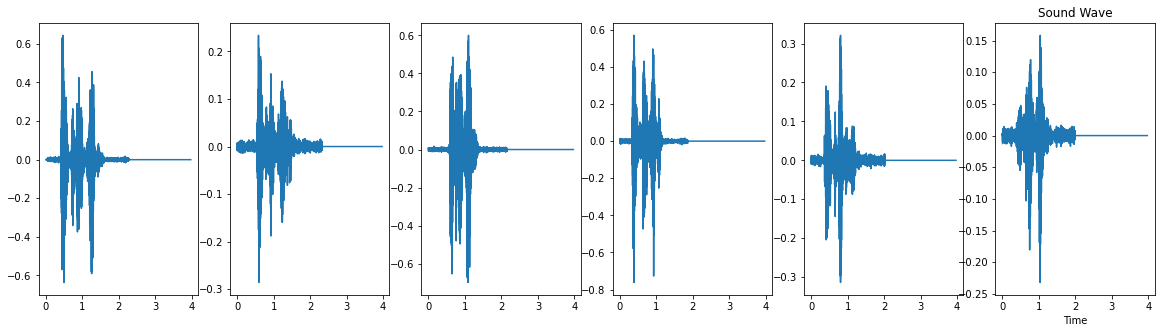

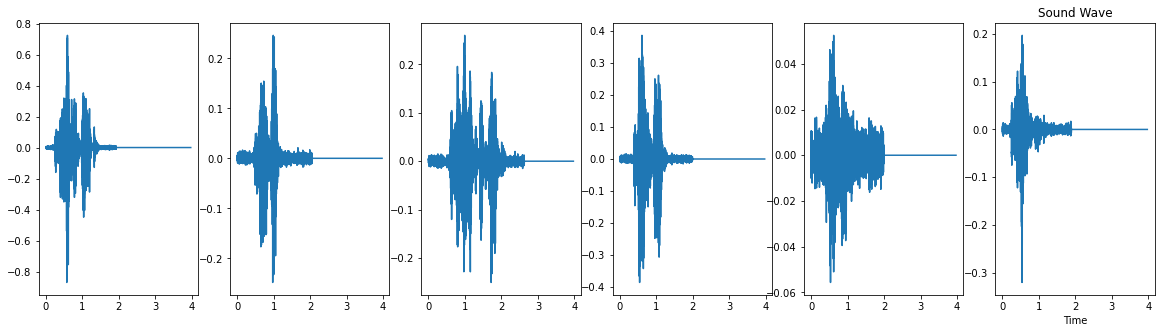

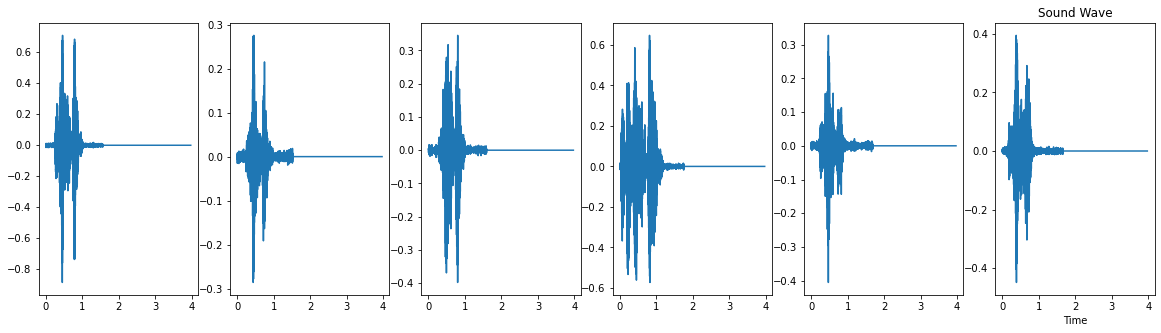

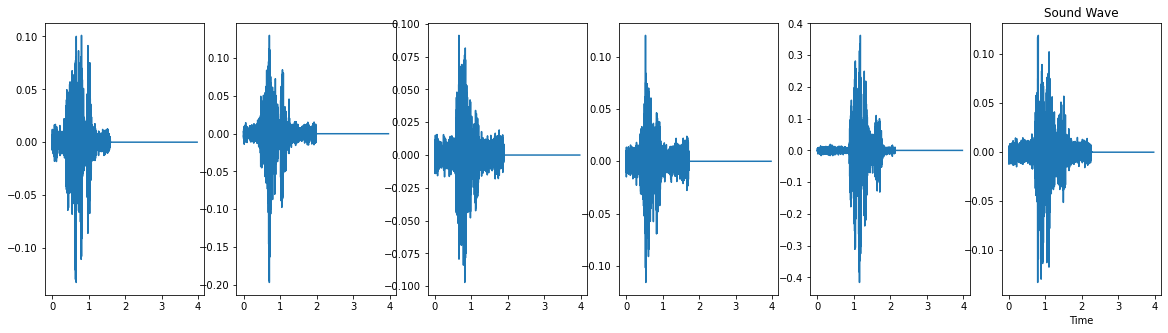

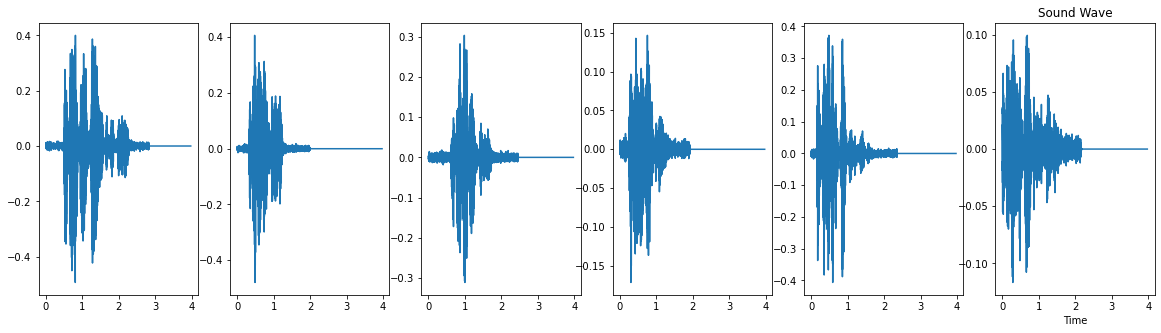

Exception ignored in: <function SoundFile.__del__ at 0x0000023F27487160>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\soundfile.py", line 688, in __del__
    self.close()
KeyboardInterrupt: 


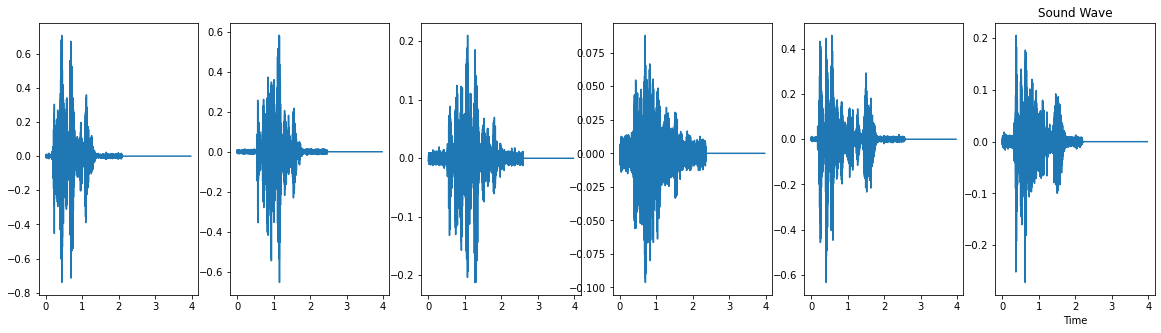

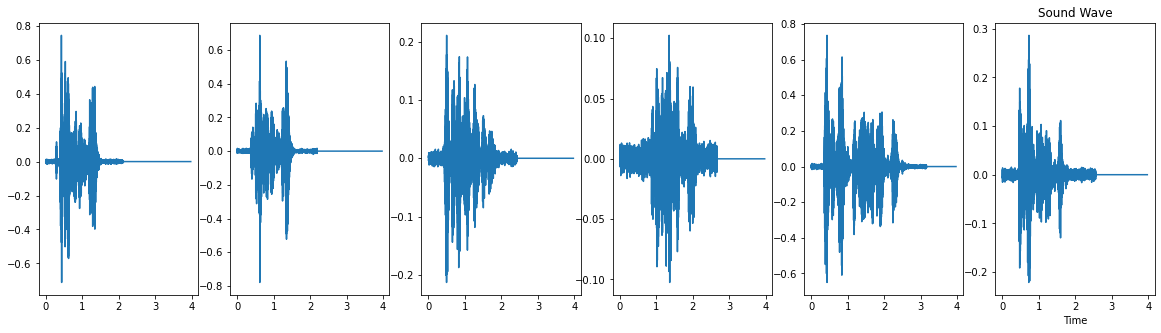

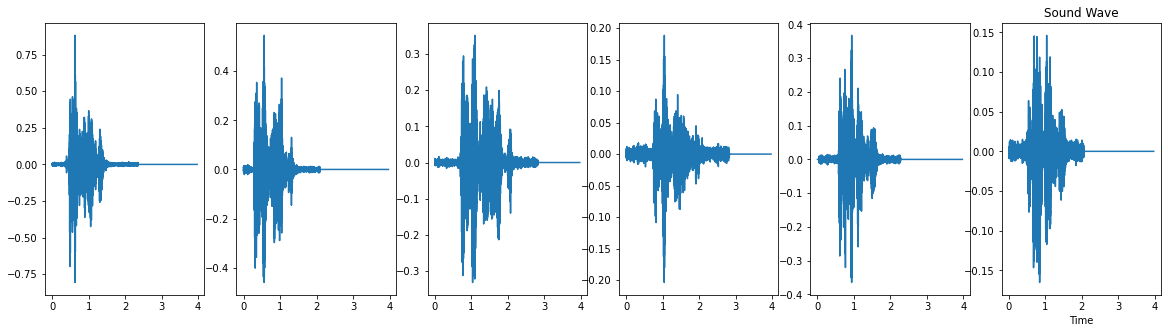

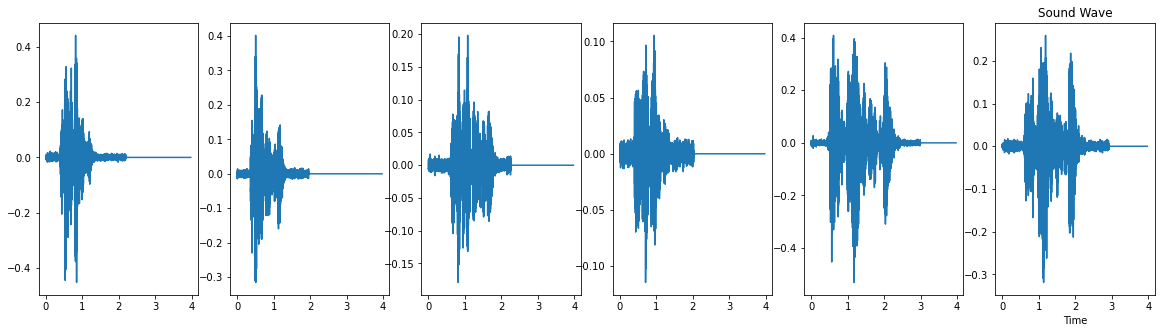

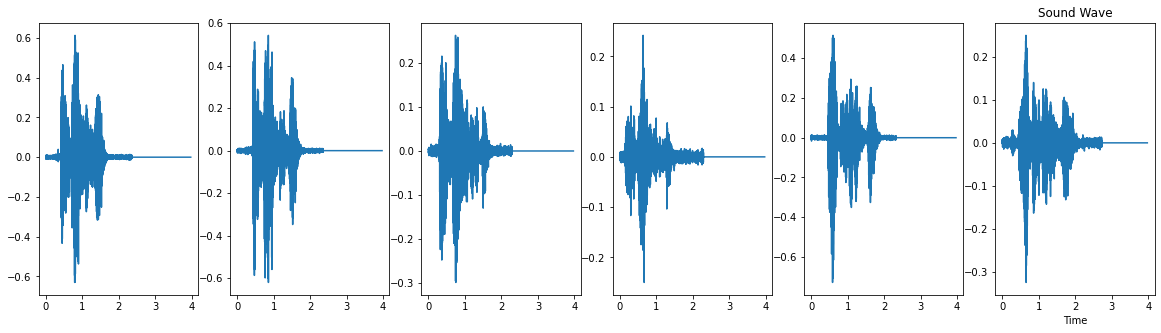

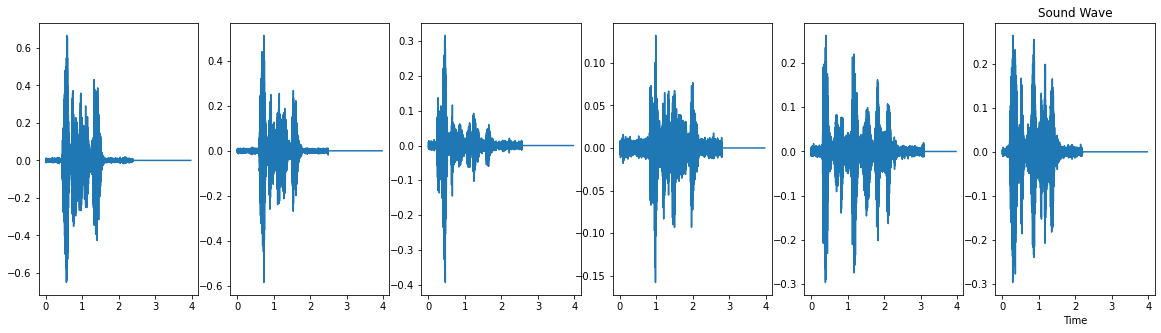

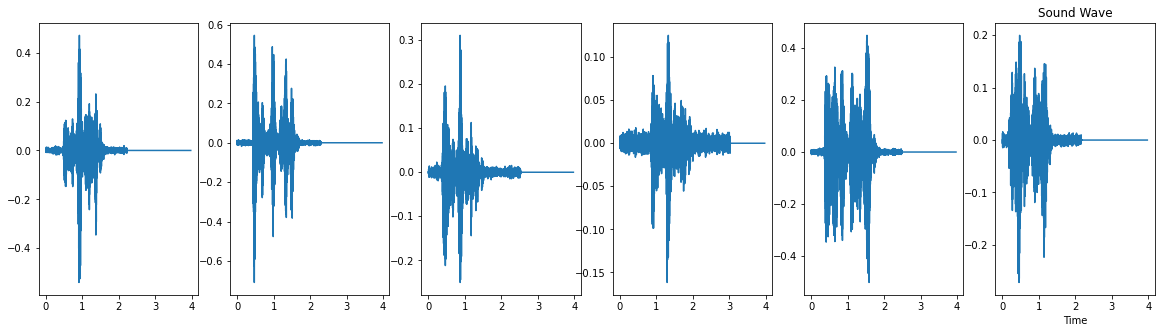

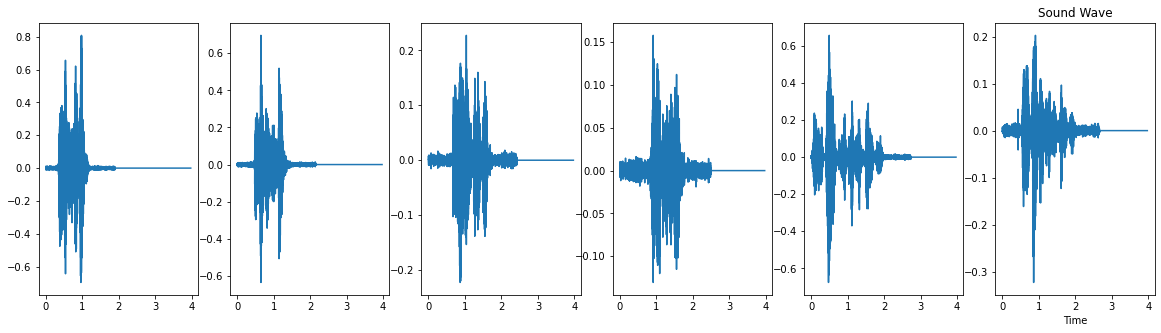

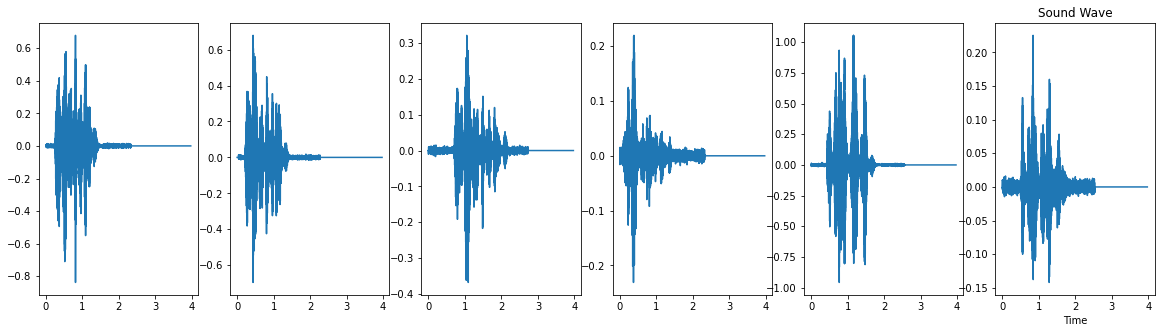

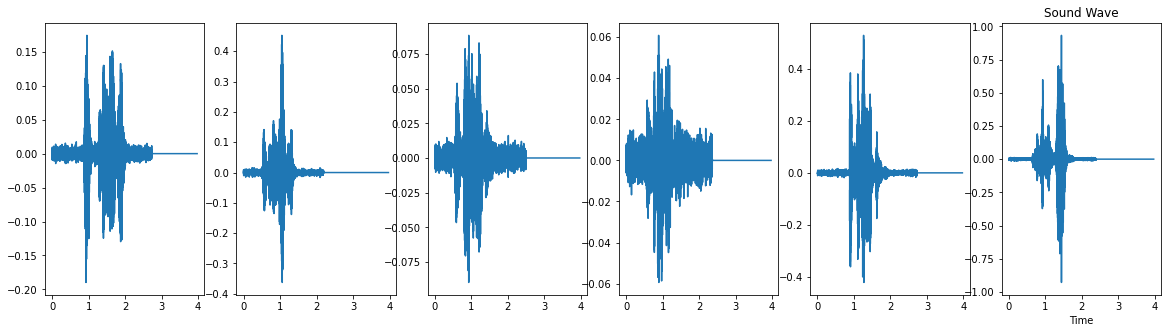

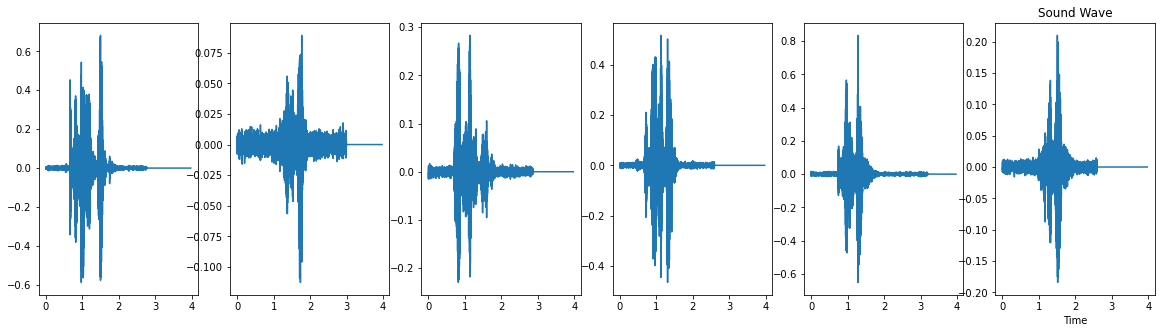

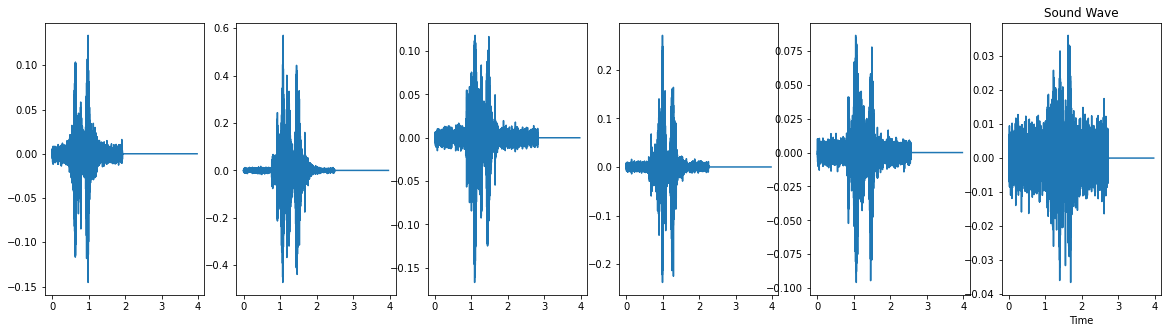

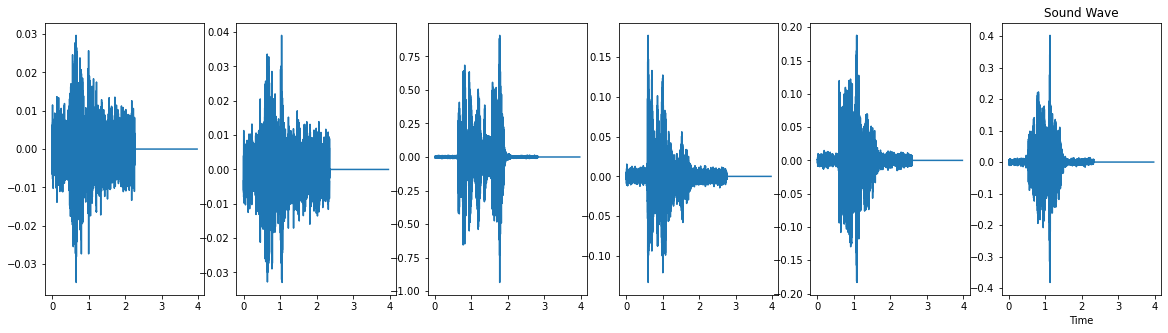

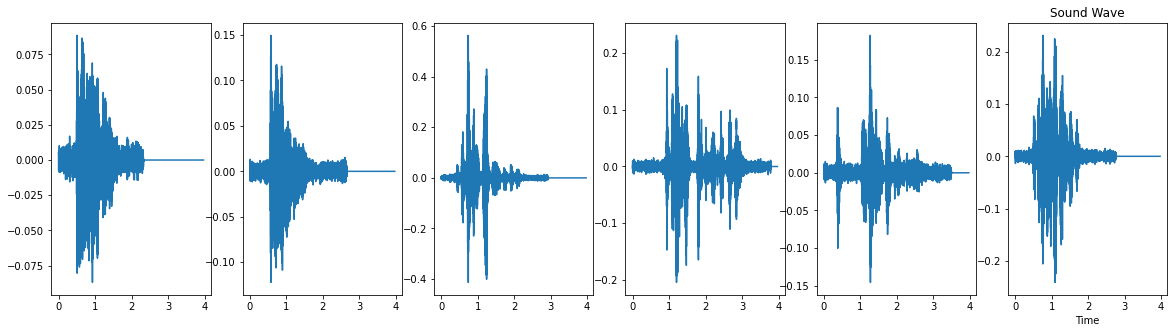

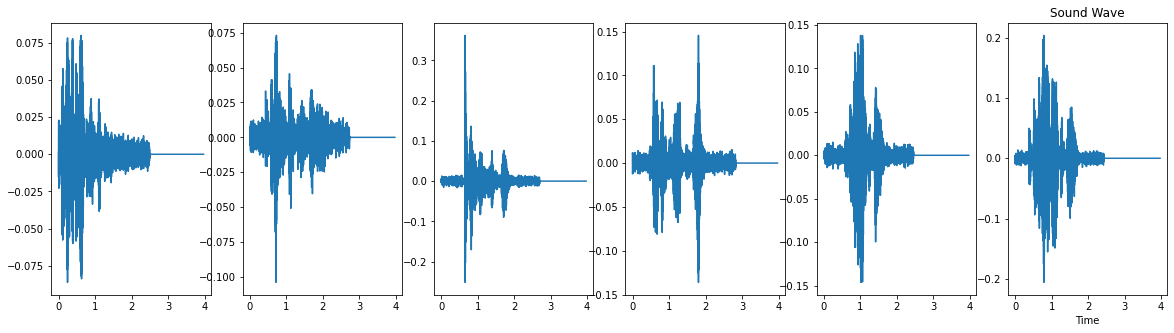

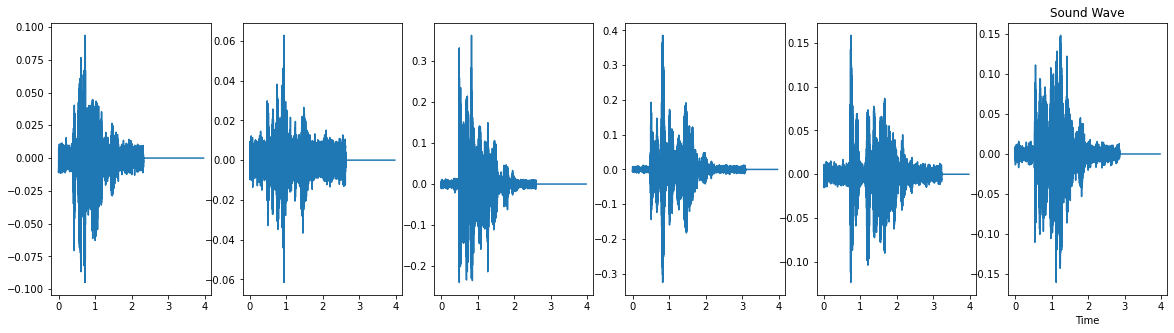

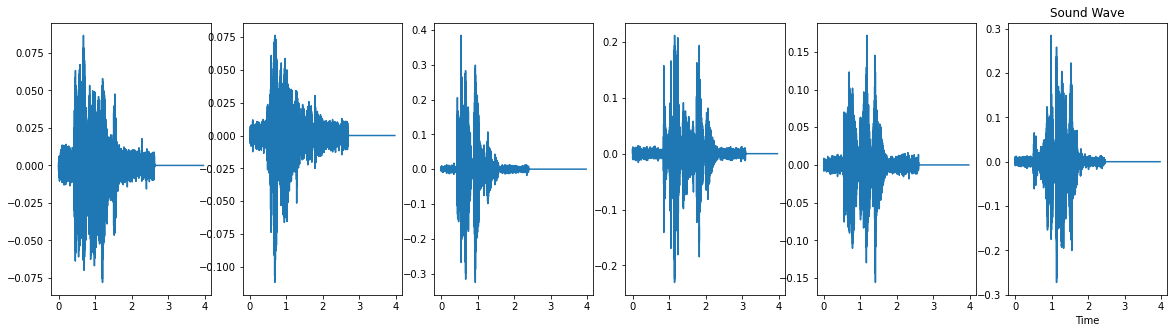

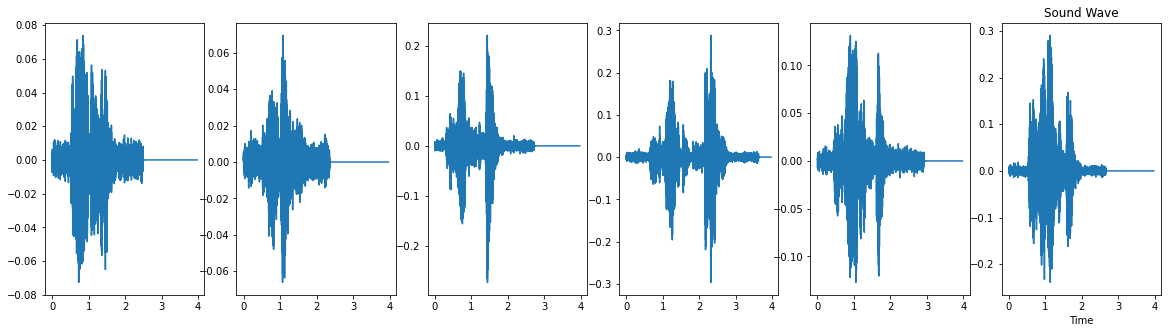

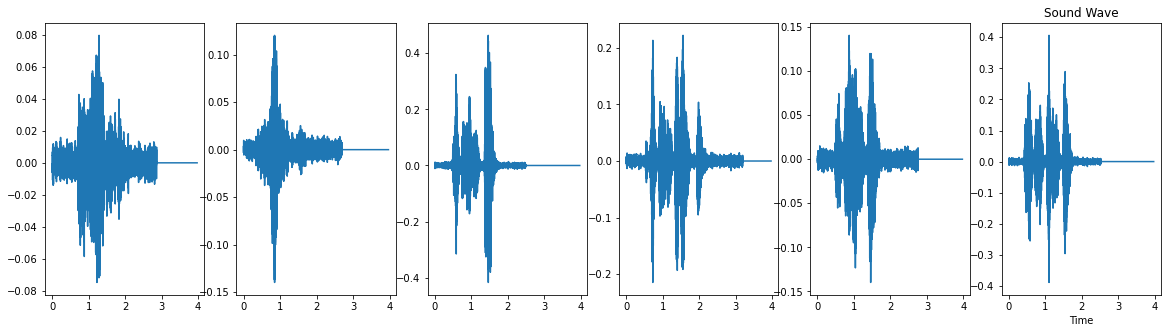

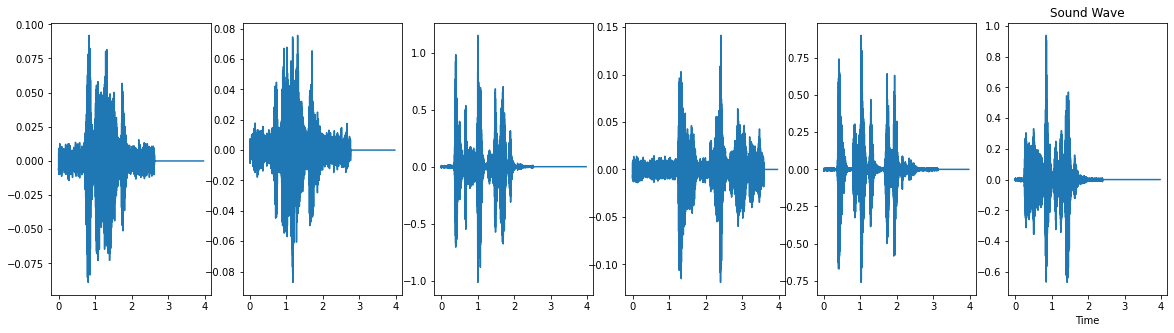

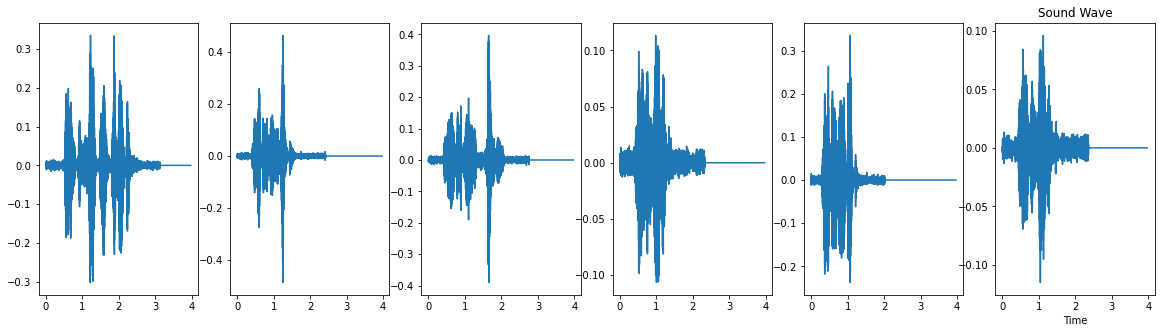

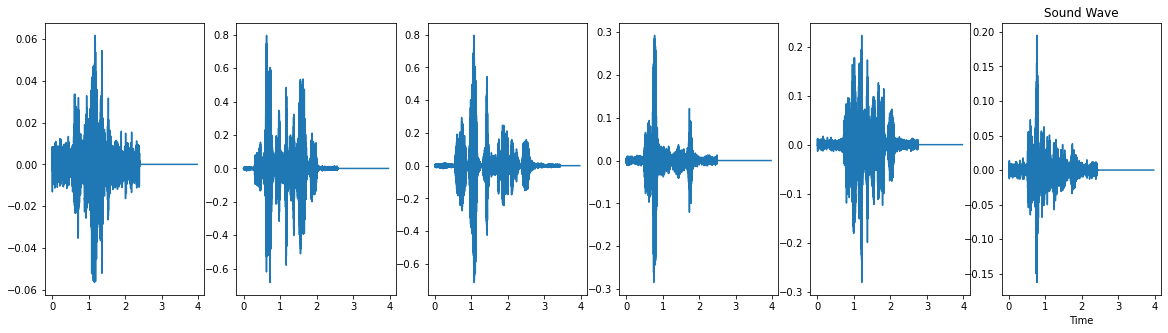

KeyboardInterrupt: 

In [74]:
plot_waveForm("Crema",audio_data,fRate)

In [22]:
def melSpectrogram(data,rate,show=0):
    spectro = list()
    for i in range(len(data)):
        S = librosa.feature.melspectrogram(data[i], sr=rate[i], n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)
        if(show == 1 ):
            librosa.display.specshow(log_S, sr=rate, x_axis='time', y_axis='mel')
        spectro.append(S)
    return spectro

In [23]:
spect = melSpectrogram(audio_data,fRate)

In [24]:
spect[0].shape

(128, 157)

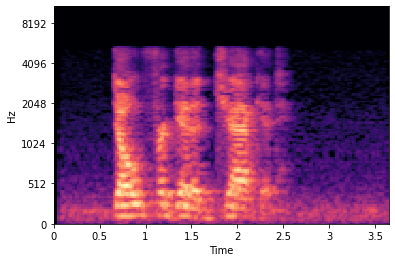

In [25]:
ps = librosa.feature.melspectrogram(y=audio_data[0],sr=fRate[0])
log_S = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(log_S,y_axis='mel',x_axis='time')

In [26]:
def ZCR(data,fRate,show=0):
    zcr = []
    j = 0
    for i in range(len(data)):
        zcr.append(librosa.feature.zero_crossing_rate(data[i]).reshape(-1,))
        print(len(zcr))
    if show == 1:
        if j == 0:
            fig,axs = plt.subplots(1,6,figsize=(20,5))
        axs[j].plot(zcrs[i])
        j+=1
        if j == 6:
            plt.show()
            j=0
    return zcr

In [27]:
zcr = ZCR(audio_data,fRate)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143


3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815


5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573


7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291


In [ ]:
zcr_padding = ZCR(padding_audio,fRate)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068


3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717


5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367


6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007


In [269]:
x = StandardScaler()

##zcr_padding = x.fit(zcr_padding)
zcr_padding[1].shape

(202,)

In [28]:
## ZCR
## 70% Training data ,, 30% Test data
X_train_zcr ,test_zcr,y_train_zcr,label_test_zcr = train_test_split(zcr,labelss,test_size=0.3,stratify=labelss)

In [29]:
## MelSpectrogram
## 70% Training data ,, 30% Test data
X_train_spect ,test_spect,y_train_spect,label_test_spect = train_test_split(spect,labelss,test_size=0.3,stratify=labelss)

In [30]:
X_train_spect2 ,val_spect,y_train_spect2,y_val_spect = train_test_split(X_train_spect,y_train_spect,test_size=0.05,stratify=y_train_spect)

In [31]:
## ZCR
X_train_zcr = np.array(X_train_zcr)
y_train_zcr = np.array(y_train_zcr)
test_zcr = np.array(test_zcr)
label_test_zcr = np.array(label_test_zcr)


In [32]:
## MelSpectogram
X_train_spect = np.array(X_train_spect)
y_train_spect = np.array(y_train_spect)
test_spect = np.array(test_spect)
label_test_spect = np.array(label_test_spect)

In [33]:
X_train_spect2 = np.array(X_train_spect2)
val_spect = np.array(val_spect)
# X_train_spect2 = np.expand_dims(X_train_spect2,3)
# val_spect = np.expand_dims(val_spect,3)

In [34]:
y_val_spect = np.array(y_val_spect)
y_train_spect2 = np.array(y_train_spect2)

In [35]:
## Expande Dimisions For Input Shape Channel=1 !!
## ZCR
X_train_zcr = np.expand_dims(X_train_zcr,2)
test_zcr = np.expand_dims(test_zcr, 2)


In [36]:

## MELSPECTROGRAM
X_train_spect = np.expand_dims(X_train_spect,3)
test_spect = np.expand_dims(test_spect, 3)


In [48]:
## MelSpectrogram Model !! 
## 24,24,m3,48,48,m3 53% 
model = models.Sequential()
model.add(layers.Conv2D(24,(3, 3),activation='relu',input_shape=X_train_spect.shape[1:]))
model.add(layers.Conv2D(24,(3, 3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Conv2D(48,(3, 3),activation='relu'))
model.add(layers.Conv2D(48,(3, 3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation="softmax"))
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(X_train_spect, y_train_spect, batch_size = 32, epochs=10, 
                    validation_split = 0.05,callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2))

Epoch 1/10
155/155 [==============================] - 5s 30ms/step - loss: 2.0809 - accuracy: 0.2781 - val_loss: 1.5776 - val_accuracy: 0.3487
Epoch 2/10
155/155 [==============================] - 5s 29ms/step - loss: 1.6002 - accuracy: 0.3341 - val_loss: 1.5146 - val_accuracy: 0.3946
Epoch 3/10
155/155 [==============================] - 5s 30ms/step - loss: 1.5493 - accuracy: 0.3547 - val_loss: 1.4781 - val_accuracy: 0.4176
Epoch 4/10
155/155 [==============================] - 5s 30ms/step - loss: 1.5167 - accuracy: 0.3700 - val_loss: 1.4391 - val_accuracy: 0.4215
Epoch 5/10
155/155 [==============================] - 5s 30ms/step - loss: 1.4647 - accuracy: 0.4052 - val_loss: 1.4058 - val_accuracy: 0.4368
Epoch 6/10
155/155 [==============================] - 5s 30ms/step - loss: 1.4529 - accuracy: 0.4076 - val_loss: 1.3944 - val_accuracy: 0.4559
Epoch 7/10
155/155 [==============================] - 5s 30ms/step - loss: 1.4142 - accuracy: 0.4238 - val_loss: 1.3743 - val_accuracy: 0.4444

In [49]:
history = model.fit(X_train_spect, y_train_spect, batch_size = 32, epochs=10, 
                    validation_split = 0.05)

Epoch 1/10
155/155 [==============================] - 5s 30ms/step - loss: 1.3338 - accuracy: 0.4624 - val_loss: 1.3118 - val_accuracy: 0.4981
Epoch 2/10
155/155 [==============================] - 5s 30ms/step - loss: 1.3080 - accuracy: 0.4808 - val_loss: 1.3027 - val_accuracy: 0.4866
Epoch 3/10
155/155 [==============================] - 5s 29ms/step - loss: 1.3025 - accuracy: 0.4808 - val_loss: 1.2661 - val_accuracy: 0.5249
Epoch 4/10
155/155 [==============================] - 5s 30ms/step - loss: 1.2864 - accuracy: 0.4820 - val_loss: 1.2938 - val_accuracy: 0.5249
Epoch 5/10
155/155 [==============================] - 5s 30ms/step - loss: 1.2520 - accuracy: 0.5004 - val_loss: 1.2804 - val_accuracy: 0.5172
Epoch 6/10
155/155 [==============================] - 5s 30ms/step - loss: 1.2362 - accuracy: 0.5107 - val_loss: 1.2582 - val_accuracy: 0.5287
Epoch 7/10
155/155 [==============================] - 5s 30ms/step - loss: 1.2131 - accuracy: 0.5133 - val_loss: 1.2496 - val_accuracy: 0.5172

In [50]:
history = model.fit(X_train_spect, y_train_spect, batch_size = 32, epochs=10, 
                    validation_split = 0.05)

Epoch 1/10
155/155 [==============================] - 5s 30ms/step - loss: 1.1358 - accuracy: 0.5471 - val_loss: 1.2590 - val_accuracy: 0.5402
Epoch 2/10
155/155 [==============================] - 5s 30ms/step - loss: 1.1428 - accuracy: 0.5507 - val_loss: 1.2810 - val_accuracy: 0.5287
Epoch 3/10
155/155 [==============================] - 5s 30ms/step - loss: 1.1103 - accuracy: 0.5564 - val_loss: 1.2940 - val_accuracy: 0.5096
Epoch 4/10
155/155 [==============================] - 5s 30ms/step - loss: 1.1112 - accuracy: 0.5594 - val_loss: 1.2422 - val_accuracy: 0.5287
Epoch 5/10
155/155 [==============================] - 5s 30ms/step - loss: 1.0963 - accuracy: 0.5701 - val_loss: 1.2653 - val_accuracy: 0.5479
Epoch 6/10
155/155 [==============================] - 5s 30ms/step - loss: 1.0633 - accuracy: 0.5867 - val_loss: 1.2452 - val_accuracy: 0.5670
Epoch 7/10
155/155 [==============================] - 5s 30ms/step - loss: 1.0992 - accuracy: 0.5782 - val_loss: 1.2212 - val_accuracy: 0.5479

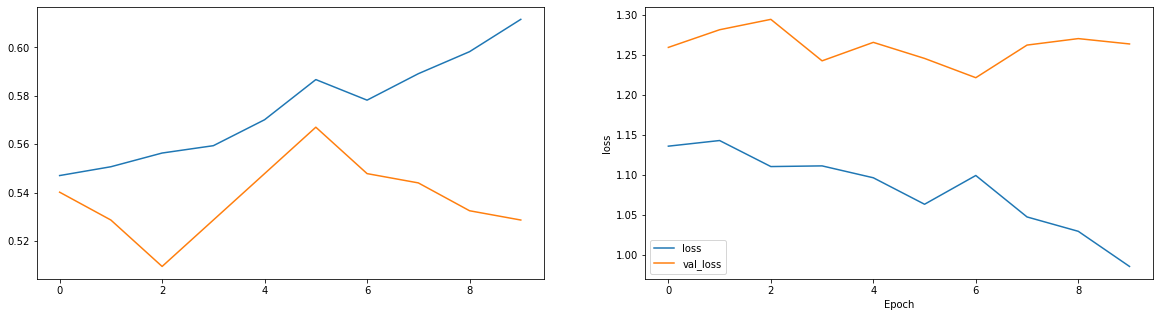

In [51]:
fig,axs = plt.subplots(1,2,figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('loss')
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [88]:
def print_report_matrix(model,x_test,batch_size,y_true):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix 
    import seaborn as sns
    classes = ["ANG","FEA","DIS","HAP","NEU","SAD"]
    y_pred = model.predict(x_test,batch_size=batch_size)
    y_pred = y_pred.argmax(axis=1)
    report = classification_report(y_true,y_pred)
    matrix = confusion_matrix(y_true,y_pred)
    df = pd.DataFrame(matrix, classes, classes)
    print("Classification Report")
    print("=====================")
    print(report)
    print("Confussion Matrix")
    print("=====================")
    plt.figure(figsize=(10,10))
    sns.heatmap(df,annot=True,fmt='g')  

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       382
           1       0.41      0.41      0.41       382
           2       0.60      0.23      0.34       381
           3       0.43      0.45      0.44       381
           4       0.47      0.67      0.56       326
           5       0.52      0.69      0.59       381

    accuracy                           0.50      2233
   macro avg       0.52      0.51      0.49      2233
weighted avg       0.52      0.50      0.49      2233

Confussion Matrix


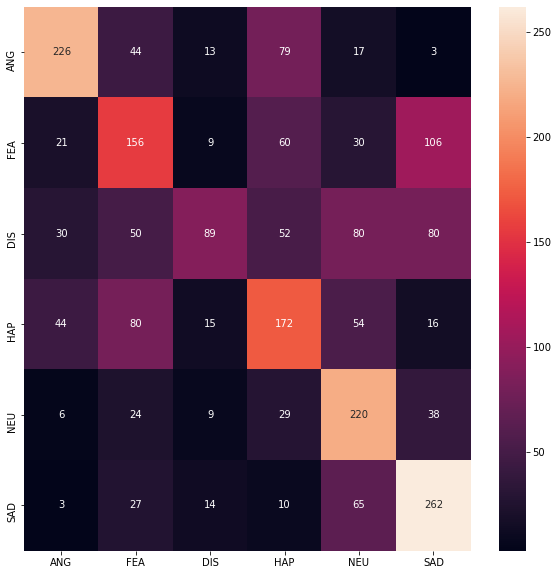

In [84]:
print_report_matrix(model=model,x_test=test_spect,batch_size=32,y_true=label_test_spect)

In [85]:
## MelSpectrogram Model !! 
## 24,24,m3,48,48,m3 53% 
model1 = models.Sequential()
model1.add(layers.Conv2D(24,(3, 3),activation='relu',input_shape=X_train_spect.shape[1:]))
model1.add(layers.Conv2D(24,(3, 3),activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(3, 3)))
model1.add(layers.Conv2D(48,(3, 3),activation='relu'))
model1.add(layers.Conv2D(48,(3, 3),activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(3, 3)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(6,activation="softmax"))
model1.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model1.fit(new_train, new_labels, batch_size = 32, epochs=50, 
                    validation_split = 0.05)

In [247]:
history = model1.fit(new_train, new_labels, batch_size = 32, epochs=10, 
                    validation_split = 0.05)

Epoch 1/10
310/310 [==============================] - 196s 631ms/step - loss: 1.2725 - accuracy: 0.4918 - val_loss: 1.3718 - val_accuracy: 0.4472
Epoch 2/10
310/310 [==============================] - 197s 635ms/step - loss: 1.2472 - accuracy: 0.5038 - val_loss: 1.3693 - val_accuracy: 0.4607
Epoch 3/10
310/310 [==============================] - 196s 633ms/step - loss: 1.2156 - accuracy: 0.5171 - val_loss: 1.3441 - val_accuracy: 0.4338
Epoch 4/10
310/310 [==============================] - 197s 635ms/step - loss: 1.1837 - accuracy: 0.5276 - val_loss: 1.3409 - val_accuracy: 0.4664
Epoch 5/10
310/310 [==============================] - 197s 635ms/step - loss: 1.1691 - accuracy: 0.5393 - val_loss: 1.3560 - val_accuracy: 0.4587
Epoch 6/10
310/310 [==============================] - 197s 637ms/step - loss: 1.1429 - accuracy: 0.5519 - val_loss: 1.3184 - val_accuracy: 0.4683
Epoch 7/10
310/310 [==============================] - 198s 638ms/step - loss: 1.0969 - accuracy: 0.5660 - val_loss: 1.3281 -

In [252]:
history = model1.fit(new_train, new_labels, batch_size = 32, epochs=5, 
                    validation_split = 0.05)

Epoch 1/5
310/310 [==============================] - 192s 619ms/step - loss: 0.7752 - accuracy: 0.7053 - val_loss: 1.1707 - val_accuracy: 0.5566
Epoch 2/5
310/310 [==============================] - 192s 619ms/step - loss: 0.7724 - accuracy: 0.7058 - val_loss: 1.1405 - val_accuracy: 0.5777
Epoch 3/5
310/310 [==============================] - 193s 622ms/step - loss: 0.7543 - accuracy: 0.7095 - val_loss: 1.1938 - val_accuracy: 0.5566
Epoch 4/5
310/310 [==============================] - 197s 635ms/step - loss: 0.7547 - accuracy: 0.7100 - val_loss: 1.2193 - val_accuracy: 0.5528
Epoch 5/5
310/310 [==============================] - 196s 632ms/step - loss: 0.7362 - accuracy: 0.7175 - val_loss: 1.1953 - val_accuracy: 0.5547


In [253]:
test_loss, test_acc = model1.evaluate(test_spect,  label_test_spect,batch_size=32)

70/70 [==============================] - 7s 105ms/step - loss: 1.7260 - accuracy: 0.5043


In [87]:
model = models.Sequential()
model.add(layers.Conv1D(256,3,activation='relu',input_shape=X_train_zcr.shape[1:]))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Conv1D(128,3,activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(64,3,activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation='softmax'))
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(X_train_zcr, y_train_zcr, batch_size = 16, epochs=50, 
                    validation_split = 0.05)

Epoch 1/50
310/310 [==============================] - 2s 5ms/step - loss: 3.0916 - accuracy: 0.2314 - val_loss: 1.9308 - val_accuracy: 0.1341
Epoch 2/50
310/310 [==============================] - 1s 5ms/step - loss: 2.1693 - accuracy: 0.2496 - val_loss: 1.7290 - val_accuracy: 0.2797
Epoch 3/50
310/310 [==============================] - 1s 4ms/step - loss: 1.8420 - accuracy: 0.2730 - val_loss: 1.6764 - val_accuracy: 0.2835
Epoch 4/50
310/310 [==============================] - 1s 4ms/step - loss: 1.7521 - accuracy: 0.2928 - val_loss: 1.6337 - val_accuracy: 0.3372
Epoch 5/50
310/310 [==============================] - 1s 4ms/step - loss: 1.7175 - accuracy: 0.2930 - val_loss: 1.6331 - val_accuracy: 0.3563
Epoch 6/50
310/310 [==============================] - 1s 4ms/step - loss: 1.6786 - accuracy: 0.3021 - val_loss: 1.6405 - val_accuracy: 0.2912
Epoch 7/50
310/310 [==============================] - 1s 4ms/step - loss: 1.6687 - accuracy: 0.3215 - val_loss: 1.6033 - val_accuracy: 0.3333
Epoch 

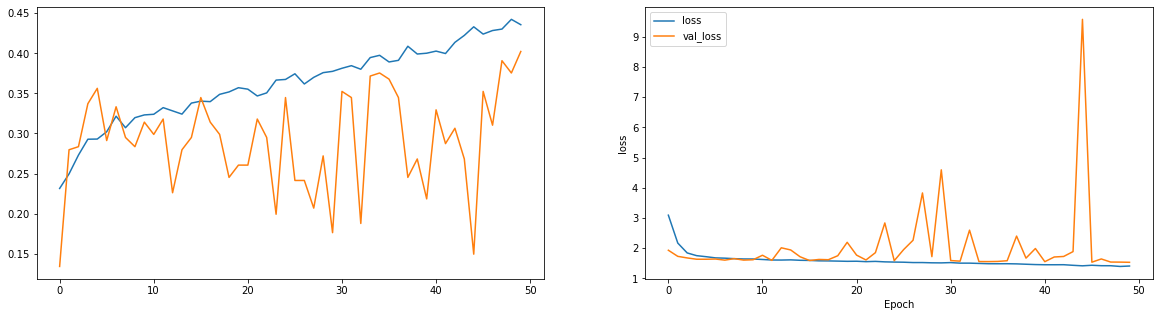

In [89]:
fig,axs = plt.subplots(1,2,figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('loss')
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
plt.legend()

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       382
           1       0.27      0.18      0.21       382
           2       0.37      0.25      0.30       381
           3       0.32      0.17      0.22       381
           4       0.36      0.31      0.34       326
           5       0.33      0.69      0.45       381

    accuracy                           0.37      2233
   macro avg       0.36      0.37      0.35      2233
weighted avg       0.36      0.37      0.35      2233

Confussion Matrix


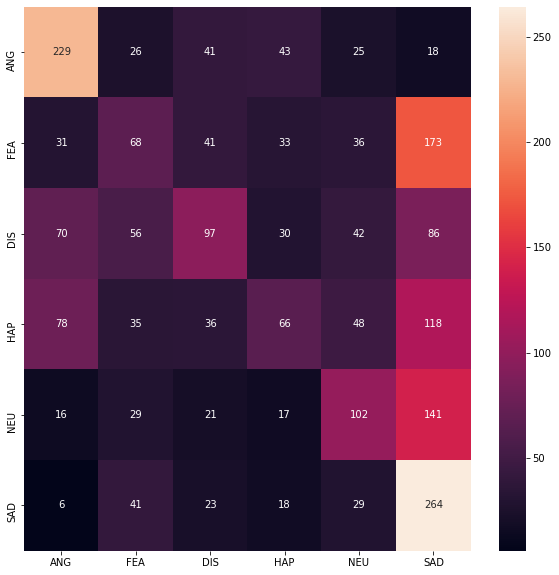

In [90]:
print_report_matrix(model=model,x_test=test_zcr,batch_size=32,y_true=label_test_zcr)

In [255]:
test_loss, test_acc = model.evaluate(test_zcr,  label_test_zcr, verbose=2)

70/70 - 2s - loss: 1.9439 - accuracy: 0.3372
